#Import Libraries

In [40]:
import pandas as pd
import numpy as np


un_test =pd.concat(pd.read_excel("UN_MigrantStockTotal_2015.xlsx", sheet_name=None), ignore_index=True)
un_test.head()

#Import Table 2

In [41]:
#import excel file Table 2 - Total Population at mid year

un_T2 = pd.read_excel("UN_MigrantStockTotal_2015.xlsx", sheet_name='Table 2')
un_T2


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,261,Samoa,NaN,882,162.865,170.158,174.614,179.928,186.029,193.228,85.009,88.488,90.932,93.185,95.95,99.644,77.856,81.67,83.682,86.743,90.079,93.584
276,262,Tokelau,NaN,772,1.609,1.520,1.552,1.210,1.135,1.250,..,..,..,..,..,..,..,..,..,..,..,..
277,263,Tonga,NaN,776,95.152,95.889,97.898,100.858,103.947,106.170,48.247,48.614,49.788,50.574,52.055,53.239,46.905,47.275,48.11,50.284,51.892,52.931
278,264,Tuvalu,NaN,798,9.004,9.227,9.419,9.694,9.827,9.916,..,..,..,..,..,..,..,..,..,..,..,..


##drop unnecessary rows

In [42]:
#drop unnecessary rows

un_T2.drop(un_T2.index[0:13], 0, inplace=True)
un_T2

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
13,Sort\norder,"Major area, region, country or area of destina...",Notes,Country code,Total population of both sexes at mid-year (th...,NaN,NaN,NaN,NaN,NaN,Total male population at mid-year (thousands),NaN,NaN,NaN,NaN,NaN,Total female population at mid-year (thousands),NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,1990,1995.000,2000.000,2005.000,2010.000,2015.000,1990,1995,2000,2005,2010,2015,1990,1995,2000,2005,2010,2015
15,1,WORLD,NaN,900,5.30967e+06,5735123.084,6126622.121,6519635.850,6929725.043,7349472.099,2.67042e+06,2.88664e+06,3.08454e+06,3.28508e+06,3.49396e+06,3.70721e+06,2.63924e+06,2.84849e+06,3.04208e+06,3.23455e+06,3.43577e+06,3.64227e+06
16,2,Developed regions,(b),901,1.14446e+06,1169761.211,1188811.731,1208919.509,1233375.711,1251351.086,555256,568268,578010,587962,599955,609297,589207,601493,610802,620957,633420,642054
17,3,Developing regions,(c),902,4.1652e+06,4565361.873,4937810.390,5310716.341,5696349.332,6098121.013,2.11517e+06,2.31837e+06,2.50653e+06,2.69712e+06,2.894e+06,3.09791e+06,2.05004e+06,2.24699e+06,2.43128e+06,2.6136e+06,2.80235e+06,3.00021e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,261,Samoa,NaN,882,162.865,170.158,174.614,179.928,186.029,193.228,85.009,88.488,90.932,93.185,95.95,99.644,77.856,81.67,83.682,86.743,90.079,93.584
276,262,Tokelau,NaN,772,1.609,1.520,1.552,1.210,1.135,1.250,..,..,..,..,..,..,..,..,..,..,..,..
277,263,Tonga,NaN,776,95.152,95.889,97.898,100.858,103.947,106.170,48.247,48.614,49.788,50.574,52.055,53.239,46.905,47.275,48.11,50.284,51.892,52.931
278,264,Tuvalu,NaN,798,9.004,9.227,9.419,9.694,9.827,9.916,..,..,..,..,..,..,..,..,..,..,..,..


##Set the first column as the headers, drop notes

In [43]:
#Set the first column as the headers, drop notes
un_T2.columns = un_T2.iloc[0]
un_T2 = un_T2.reindex(un_T2.index.drop(13))
un_T2 = un_T2.drop("Notes", 1)
un_T2.head()

13,Sort\norder,"Major area, region, country or area of destination",Country code,Total population of both sexes at mid-year (thousands),NaN,NaN,NaN,NaN,NaN,Total male population at mid-year (thousands),NaN,NaN,NaN,NaN,NaN,Total female population at mid-year (thousands),NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,1990,1995.000,2000.000,2005.000,2010.000,2015.000,1990,1995,2000,2005,2010,2015,1990,1995,2000,2005,2010,2015
15,1,WORLD,900,5.30967e+06,5735123.084,6126622.121,6519635.850,6929725.043,7349472.099,2.67042e+06,2.88664e+06,3.08454e+06,3.28508e+06,3.49396e+06,3.70721e+06,2.63924e+06,2.84849e+06,3.04208e+06,3.23455e+06,3.43577e+06,3.64227e+06
16,2,Developed regions,901,1.14446e+06,1169761.211,1188811.731,1208919.509,1233375.711,1251351.086,555256,568268,578010,587962,599955,609297,589207,601493,610802,620957,633420,642054
17,3,Developing regions,902,4.1652e+06,4565361.873,4937810.390,5310716.341,5696349.332,6098121.013,2.11517e+06,2.31837e+06,2.50653e+06,2.69712e+06,2.894e+06,3.09791e+06,2.05004e+06,2.24699e+06,2.43128e+06,2.6136e+06,2.80235e+06,3.00021e+06
18,4,Least developed countries,941,510058,585189.354,664386.087,752804.951,847254.847,954157.804,254043,292027,331482,375758,422398,476031,256015,293163,332904,377047,424857,478127


##Set a new index drop sort

In [44]:
#Set a new index
un_T2_index = pd.Series(range(266)) 
un_T2 = un_T2.set_index([un_T2_index])
un_T2 = un_T2.drop("Sort\norder", 1)
un_T2.head()

13,"Major area, region, country or area of destination",Country code,Total population of both sexes at mid-year (thousands),NaN,NaN,NaN,NaN,NaN,Total male population at mid-year (thousands),NaN,NaN,NaN,NaN,NaN,Total female population at mid-year (thousands),NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,1990,1995.000,2000.000,2005.000,2010.000,2015.000,1990,1995,2000,2005,2010,2015,1990,1995,2000,2005,2010,2015
1,WORLD,900,5.30967e+06,5735123.084,6126622.121,6519635.850,6929725.043,7349472.099,2.67042e+06,2.88664e+06,3.08454e+06,3.28508e+06,3.49396e+06,3.70721e+06,2.63924e+06,2.84849e+06,3.04208e+06,3.23455e+06,3.43577e+06,3.64227e+06
2,Developed regions,901,1.14446e+06,1169761.211,1188811.731,1208919.509,1233375.711,1251351.086,555256,568268,578010,587962,599955,609297,589207,601493,610802,620957,633420,642054
3,Developing regions,902,4.1652e+06,4565361.873,4937810.390,5310716.341,5696349.332,6098121.013,2.11517e+06,2.31837e+06,2.50653e+06,2.69712e+06,2.894e+06,3.09791e+06,2.05004e+06,2.24699e+06,2.43128e+06,2.6136e+06,2.80235e+06,3.00021e+06
4,Least developed countries,941,510058,585189.354,664386.087,752804.951,847254.847,954157.804,254043,292027,331482,375758,422398,476031,256015,293163,332904,377047,424857,478127


## Create a copied dataset of the cleaned dataset 

In [45]:
# Create a copied dataset of the cleaned dataset 
un_T2A = un_T2
# Label the each columns
un_T2A.columns=['Location','Code', 'Total Pop','Total Pop',
                 'Total Pop', 'Total Pop','Total Pop',
                 'Total Pop', 'Male Total Pop', 'Male Total Pop', 'Male Total Pop', 'Male Total Pop',    
                 'Male Total Pop', 'Male Total Pop', 'Female Total Pop', 'Female Total Pop', 'Female Total Pop',  
                 'Female Total Pop', 'Female Total Pop', 'Female Total Pop']
# Replace the null value with 'Location'
un_T2A["Location"] =  un_T2A["Location"].fillna("Location")
un_T2A["Code"] =  un_T2A["Code"].fillna("Code")
un_T2A.head()

,Location,Code,Total Pop,Total Pop,Total Pop,Total Pop,Total Pop,Total Pop,Male Total Pop,Male Total Pop,Male Total Pop,Male Total Pop,Male Total Pop,Male Total Pop,Female Total Pop,Female Total Pop,Female Total Pop,Female Total Pop,Female Total Pop,Female Total Pop
0,Location,Code,1990,1995.000,2000.000,2005.000,2010.000,2015.000,1990,1995,2000,2005,2010,2015,1990,1995,2000,2005,2010,2015
1,WORLD,900,5.30967e+06,5735123.084,6126622.121,6519635.850,6929725.043,7349472.099,2.67042e+06,2.88664e+06,3.08454e+06,3.28508e+06,3.49396e+06,3.70721e+06,2.63924e+06,2.84849e+06,3.04208e+06,3.23455e+06,3.43577e+06,3.64227e+06
2,Developed regions,901,1.14446e+06,1169761.211,1188811.731,1208919.509,1233375.711,1251351.086,555256,568268,578010,587962,599955,609297,589207,601493,610802,620957,633420,642054
3,Developing regions,902,4.1652e+06,4565361.873,4937810.390,5310716.341,5696349.332,6098121.013,2.11517e+06,2.31837e+06,2.50653e+06,2.69712e+06,2.894e+06,3.09791e+06,2.05004e+06,2.24699e+06,2.43128e+06,2.6136e+06,2.80235e+06,3.00021e+06
4,Least developed countries,941,510058,585189.354,664386.087,752804.951,847254.847,954157.804,254043,292027,331482,375758,422398,476031,256015,293163,332904,377047,424857,478127


#Total Population - Create table of columns

Dont use
Total_Pop.columns.map(str)
Index(['1990', '1995.0', '2000.0', '2005.0','2010.0','2015.0'], dtype='object')
Index([1995.0, 2000.0, 2005.0, 2010.0, 2015.0], dtype='object')


In [46]:
Total_Pop = un_T2A[['Location','Code','Total Pop']]
Total_Pop['Population'] = 'Total Pop'
Total_Pop.iloc[0,8] ='Population'
Total_Pop.columns = Total_Pop.iloc[0]
Total_Pop.columns = Total_Pop.columns.astype(str)
Total_Pop.rename(columns={"1995.0":"1995","2000.0":"2000","2005.0":"2005","2010.0":"2010","2015.0":"2015"}, inplace=True)
Total_Pop = Total_Pop.reindex(Total_Pop.index.drop(0))
Total_Pop = Total_Pop[['Population','Location','Code', '1990','1995','2000','2005','2010','2015']]
Total_Pop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,Population,Location,Code,1990,1995,2000,2005,2010,2015
1,Total Pop,WORLD,900,5.30967e+06,5735123.084,6126622.121,6519635.850,6929725.043,7349472.099
2,Total Pop,Developed regions,901,1.14446e+06,1169761.211,1188811.731,1208919.509,1233375.711,1251351.086
3,Total Pop,Developing regions,902,4.1652e+06,4565361.873,4937810.390,5310716.341,5696349.332,6098121.013
4,Total Pop,Least developed countries,941,510058,585189.354,664386.087,752804.951,847254.847,954157.804
5,Total Pop,Less developed regions excluding least develop...,934,3.65515e+06,3980172.519,4273424.303,4557911.390,4849094.485,5143963.209
...,...,...,...,...,...,...,...,...,...
261,Total Pop,Samoa,882,162.865,170.158,174.614,179.928,186.029,193.228
262,Total Pop,Tokelau,772,1.609,1.520,1.552,1.210,1.135,1.250
263,Total Pop,Tonga,776,95.152,95.889,97.898,100.858,103.947,106.170
264,Total Pop,Tuvalu,798,9.004,9.227,9.419,9.694,9.827,9.916


## Set index Total Pop 

In [47]:
# Set index
Total_Pop.set_index(['Population','Location','Code'], inplace=True)
Total_Pop.columns.names = ['Year']
# convert the dataframes into a long format
Total_Pop_l = Total_Pop.stack().to_frame()
# Name the column
Total_Pop_l.columns = ['Total Pop']
# Remove the empty spaces between numbers by applying regular expression 
Total_Pop_l.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
Total_Pop_l.head(10)

Total Pop
Population Location          Code Year             
Total Pop  WORLD             900  1990  5309667.699
                                  1995  5735123.084
                                  2000  6126622.121
                                  2005  6519635.850
                                  2010  6929725.043
                                  2015  7349472.099
           Developed regions 901  1990  1144463.062
                                  1995  1169761.211
                                  2000  1188811.731
                                  2005  1208919.509

## Data frame Total Pop

In [48]:
# data frame Total Pop
Total_Pop_l['Total Pop'] = Total_Pop_l['Total Pop'].apply(pd.to_numeric)
Total_Pop_l


Total Pop
Population Location                  Code Year             
Total Pop  WORLD                     900  1990  5309667.699
                                          1995  5735123.084
                                          2000  6126622.121
                                          2005  6519635.850
                                          2010  6929725.043
...                                                     ...
           Wallis and Futuna Islands 876  1995       14.143
                                          2000       14.497
                                          2005       14.246
                                          2010       13.565
                                          2015       13.151

[1590 rows x 1 columns]

## Pivot Population column of Total Pop 

In [49]:
# Pivot Population column of Total Pop 
long_both = pd.pivot_table(Total_Pop_l, values='Total Pop', index=['Location','Code','Year'], columns=['Population'])
long_both=long_both.round(decimals = 2)
long_both

Population             Total Pop
Location    Code Year           
Afghanistan 4    1990   12067.57
                 1995   16772.52
                 2000   19701.94
                 2005   24399.95
                 2010   27962.21
...                          ...
Zimbabwe    716  1995   11683.14
                 2000   12499.98
                 2005   12984.42
                 2010   13973.90
                 2015   15602.75

[1590 rows x 1 columns]

#Male Total Population - Create table of columns

In [50]:
#Create a table of data of the columns of Male
Total_male = un_T2A[['Location','Code','Male Total Pop']]
# Add a new column with a label, 'Population' 
# and fill the values with 'Male' 
Total_male['Population'] = 'Male Total Pop'
# Replace the value on the Population column on the first row to reindex the table by the first row
Total_male.iloc[0,8] ='Population'
#Set the first column as the headers
Total_male.columns = Total_male.iloc[0]
Total_male.columns = Total_male.columns.astype(str)
Total_male.rename(columns={"1995.0":"1995","2000.0":"2000","2005.0":"2005","2010.0":"2010","2015.0":"2015"}, inplace=True)
Total_male = Total_male.reindex(Total_male.index.drop(0))
#Reorder the columns
Total_male = Total_male[['Population','Location','Code','1990','1995','2000','2005','2010','2015']]
Total_male.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i

,Population,Location,Code,1990,1995,2000,2005,2010,2015
1,Male Total Pop,WORLD,900,2.67042e+06,2.88664e+06,3.08454e+06,3.28508e+06,3.49396e+06,3.70721e+06
2,Male Total Pop,Developed regions,901,555256,568268,578010,587962,599955,609297
3,Male Total Pop,Developing regions,902,2.11517e+06,2.31837e+06,2.50653e+06,2.69712e+06,2.894e+06,3.09791e+06
4,Male Total Pop,Least developed countries,941,254043,292027,331482,375758,422398,476031
5,Male Total Pop,Less developed regions excluding least develop...,934,1.86113e+06,2.02634e+06,2.17504e+06,2.32136e+06,2.4716e+06,2.62188e+06


##Set index Male Total Pop

In [51]:
# Set index
Total_male.set_index(['Population','Location','Code'], inplace=True)
Total_male.columns.names = ['Year']
# convert the dataframes into a long format
Total_male_l = Total_male.stack().to_frame()
# Name the column
Total_male_l.columns = ['Male Total Pop']
# Remove the empty spaces between numbers by applying regular expression 
Total_male_l.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
Total_male_l.head(10)

Male Total Pop
Population     Location          Code Year               
Male Total Pop WORLD             900  1990    2.67042e+06
                                      1995    2.88664e+06
                                      2000    3.08454e+06
                                      2005    3.28508e+06
                                      2010    3.49396e+06
                                      2015    3.70721e+06
               Developed regions 901  1990         555256
                                      1995         568268
                                      2000         578010
                                      2005         587962

##Data frame Male Total Pop

In [52]:
# data frame of Male 
Total_male_l['Male Total Pop'] = Total_male_l['Male Total Pop'].apply(pd.to_numeric)
Total_male_l

Male Total Pop
Population     Location                  Code Year                
Male Total Pop WORLD                     900  1990     2670423.701
                                              1995     2886635.893
                                              2000     3084537.662
                                              2005     3285082.249
                                              2010     3493956.904
...                                                            ...
               Wallis and Futuna Islands 876  1995             NaN
                                              2000             NaN
                                              2005             NaN
                                              2010             NaN
                                              2015             NaN

[1590 rows x 1 columns]

##Pivot Population column of Male Total Pop

In [53]:
# pivot Population column of the Male Total Pop
long_male = pd.pivot_table(Total_male_l, values='Male Total Pop', index=['Location','Code','Year'], columns=['Population'])
long_male=long_male.round(decimals = 2)
long_male

Population             Male Total Pop
Location    Code Year                
Afghanistan 4    1990         6179.83
                 1995         8682.44
                 2000        10146.54
                 2005        12616.33
                 2010        14367.63
...                               ...
Zimbabwe    716  1995         5805.63
                 2000         6219.85
                 2005         6436.24
                 2010         6905.04
                 2015         7687.56

[1398 rows x 1 columns]

#Female Total Population - Create table of columns

In [54]:
#Create a table of data of the columns of Female
Total_female = un_T2A[['Location','Code','Female Total Pop']]
# Add a new column with a label, 'Population' 
# and fill the values with 'Female' 
Total_female['Population'] = 'Female Total Pop'
# Replace the value on the Population column on the first row to reindex the table by the first row
Total_female.iloc[0,8] ='Population'
#Set the first column as the headers
Total_female.columns = Total_female.iloc[0]
Total_female.columns = Total_female.columns.astype(str)
Total_female.rename(columns={"1995.0":"1995","2000.0":"2000","2005.0":"2005","2010.0":"2010","2015.0":"2015"}, inplace=True)
Total_female = Total_female.reindex(Total_female.index.drop(0))
#Reorder the columns
Total_female = Total_female[['Population','Location','Code','1990','1995','2000','2005','2010','2015']]
Total_female.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i

,Population,Location,Code,1990,1995,2000,2005,2010,2015
1,Female Total Pop,WORLD,900,2.63924e+06,2.84849e+06,3.04208e+06,3.23455e+06,3.43577e+06,3.64227e+06
2,Female Total Pop,Developed regions,901,589207,601493,610802,620957,633420,642054
3,Female Total Pop,Developing regions,902,2.05004e+06,2.24699e+06,2.43128e+06,2.6136e+06,2.80235e+06,3.00021e+06
4,Female Total Pop,Least developed countries,941,256015,293163,332904,377047,424857,478127
5,Female Total Pop,Less developed regions excluding least develop...,934,1.79402e+06,1.95383e+06,2.09838e+06,2.23655e+06,2.37749e+06,2.52209e+06


##Set index Female Total Pop

In [55]:
# Set index
Total_female.set_index(['Population','Location','Code'], inplace=True)
Total_female.columns.names = ['Year']
# convert the dataframes into a long format
Total_female_l = Total_female.stack().to_frame()
# Name the column
Total_female_l.columns = ['Female Total Pop']
# Remove the empty spaces between numbers by applying regular expression 
Total_female_l.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
Total_female_l.head(10)

Female Total Pop
Population       Location          Code Year                 
Female Total Pop WORLD             900  1990      2.63924e+06
                                        1995      2.84849e+06
                                        2000      3.04208e+06
                                        2005      3.23455e+06
                                        2010      3.43577e+06
                                        2015      3.64227e+06
                 Developed regions 901  1990           589207
                                        1995           601493
                                        2000           610802
                                        2005           620957

##Dataframe Female Total Pop

In [56]:
# dataframe of Female 
Total_female_l['Female Total Pop'] = Total_female_l['Female Total Pop'].apply(pd.to_numeric)
Total_female_l

Female Total Pop
Population       Location                  Code Year                  
Female Total Pop WORLD                     900  1990       2639243.998
                                                1995       2848487.191
                                                2000       3042084.459
                                                2005       3234553.601
                                                2010       3435768.139
...                                                                ...
                 Wallis and Futuna Islands 876  1995               NaN
                                                2000               NaN
                                                2005               NaN
                                                2010               NaN
                                                2015               NaN

[1590 rows x 1 columns]

##Pivot Population column of Female Total Pop

In [57]:
# pivot Population column of the dataframe of Female 
long_female = pd.pivot_table(Total_female_l, values='Female Total Pop', index=['Location','Code','Year'], columns=['Population'])
long_female=long_female.round(decimals = 2)
long_female

Population             Female Total Pop
Location    Code Year                  
Afghanistan 4    1990           5887.74
                 1995           8090.08
                 2000           9555.40
                 2005          11783.62
                 2010          13594.57
...                                 ...
Zimbabwe    716  1995           5877.50
                 2000           6280.13
                 2005           6548.18
                 2010           7068.86
                 2015           7915.19

[1398 rows x 1 columns]

#Merge Table 2 Dataframes

In [58]:
# Create a list of the name of dataframes 
df2 = [long_both, long_male, long_female]
# merge the dataframes by using pd.concat() function
Table2 = pd.concat(df2, axis =1)
Table2.head(20)

Population              Total Pop  Male Total Pop  Female Total Pop
Location    Code Year                                              
Afghanistan 4    1990    12067.57         6179.83           5887.74
                 1995    16772.52         8682.44           8090.08
                 2000    19701.94        10146.54           9555.40
                 2005    24399.95        12616.33          11783.62
                 2010    27962.21        14367.63          13594.57
                 2015    32526.56        16773.70          15752.86
Africa      903  1990   631614.30       315071.38         316542.93
                 1995   720416.39       359408.82         361007.57
                 2000   814063.15       406405.56         407657.58
                 2005   920238.94       459590.53         460648.42
                 2010  1044106.86       521739.73         522367.13
                 2015  1186178.28       593454.63         592723.65
Albania     8    1990     3281.45         1680.64           1600.82
                 1995     3106.73         1529.24           1577.49
                 2000     3121.96         1577.62           1544.34
                 2005     3082.17         1548.92           1533.25
                 2010     2901.88         1462.76           1439.12
                 2015     2896.68         1436.82           1459.86
Algeria     12   1990    25912.36        13117.24          12795.12
                 1995    28904.30        14639.46          14264.84

#Import Table 1

In [59]:
#import excel file Table 1 - Total Population at mid year

un_T1 = pd.read_excel("UN_MigrantStockTotal_2015.xlsx", sheet_name='Table 1')
un_T1

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,261,Samoa,NaN,882,B,3357,4694,5998,5746,5122.0,4929.0,1771,2451,3101,2940,2594.0,2469.0,1586,2243,2897,2806,2528.0,2460.0
276,262,Tokelau,NaN,772,B,270,266,262,258,429.0,487.0,150,147,144,133,206.0,233.0,120,119,118,125,223.0,254.0
277,263,Tonga,NaN,776,B,2911,3274,3684,4301,5022.0,5731.0,1488,1718,1981,2328,2727.0,3127.0,1423,1556,1703,1973,2295.0,2604.0
278,264,Tuvalu,NaN,798,C,318,263,217,183,154.0,141.0,180,148,121,101,85.0,78.0,138,115,96,82,69.0,63.0


##drop unnecessary rows

In [60]:
#drop unnecessary rows

un_T1.drop(un_T1.index[0:13], 0, inplace=True)
un_T1

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
13,Sort\norder,"Major area, region, country or area of destina...",Notes,Country code,Type of data (a),International migrant stock at mid-year (both ...,NaN,NaN,NaN,NaN,NaN,International migrant stock at mid-year (male),NaN,NaN,NaN,NaN,NaN,International migrant stock at mid-year (female),NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,1990,1995,2000,2005,2010.0,2015.0,1990,1995,2000,2005,2010.0,2015.0,1990,1995,2000,2005,2010.0,2015.0
15,1,WORLD,NaN,900,NaN,152563212,160801752,172703309,191269100,221714243.0,243700236.0,77747510,81737477,87884839,97866674,114613714.0,126115435.0,74815702,79064275,84818470,93402426,107100529.0,117584801.0
16,2,Developed regions,(b),901,NaN,82378628,92306854,103375363,117181109,132560325.0,140481955.0,40263397,45092799,50536796,57217777,64081077.0,67618619.0,42115231,47214055,52838567,59963332,68479248.0,72863336.0
17,3,Developing regions,(c),902,NaN,70184584,68494898,69327946,74087991,89153918.0,103218281.0,37484113,36644678,37348043,40648897,50532637.0,58496816.0,32700471,31850220,31979903,33439094,38621281.0,44721465.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,261,Samoa,NaN,882,B,3357,4694,5998,5746,5122.0,4929.0,1771,2451,3101,2940,2594.0,2469.0,1586,2243,2897,2806,2528.0,2460.0
276,262,Tokelau,NaN,772,B,270,266,262,258,429.0,487.0,150,147,144,133,206.0,233.0,120,119,118,125,223.0,254.0
277,263,Tonga,NaN,776,B,2911,3274,3684,4301,5022.0,5731.0,1488,1718,1981,2328,2727.0,3127.0,1423,1556,1703,1973,2295.0,2604.0
278,264,Tuvalu,NaN,798,C,318,263,217,183,154.0,141.0,180,148,121,101,85.0,78.0,138,115,96,82,69.0,63.0


##Set the first column as the headers, drop notes

In [61]:
#Set the first column as the headers, drop notes
un_T1.columns = un_T1.iloc[0]
un_T1 = un_T1.reindex(un_T1.index.drop(13))
un_T1 = un_T1.drop("Notes", 1)
un_T1.head()

13,Sort\norder,"Major area, region, country or area of destination",Country code,Type of data (a),International migrant stock at mid-year (both sexes),NaN,NaN,NaN,NaN,NaN,International migrant stock at mid-year (male),NaN,NaN,NaN,NaN,NaN,International migrant stock at mid-year (female),NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,1990,1995,2000,2005,2010.0,2015.0,1990,1995,2000,2005,2010.0,2015.0,1990,1995,2000,2005,2010.0,2015.0
15,1,WORLD,900,NaN,152563212,160801752,172703309,191269100,221714243.0,243700236.0,77747510,81737477,87884839,97866674,114613714.0,126115435.0,74815702,79064275,84818470,93402426,107100529.0,117584801.0
16,2,Developed regions,901,NaN,82378628,92306854,103375363,117181109,132560325.0,140481955.0,40263397,45092799,50536796,57217777,64081077.0,67618619.0,42115231,47214055,52838567,59963332,68479248.0,72863336.0
17,3,Developing regions,902,NaN,70184584,68494898,69327946,74087991,89153918.0,103218281.0,37484113,36644678,37348043,40648897,50532637.0,58496816.0,32700471,31850220,31979903,33439094,38621281.0,44721465.0
18,4,Least developed countries,941,NaN,11075966,11711703,10077824,9809634,10018128.0,11951316.0,5843107,6142712,5361902,5383009,5462714.0,6463217.0,5236216,5573685,4721920,4432371,4560536.0,5493028.0


##Set a new index drop sort & Type of Data

In [62]:
#Set a new index
un_T1_index = pd.Series(range(266)) 
un_T1 = un_T1.set_index([un_T1_index])
un_T1 = un_T1.drop("Sort\norder", 1)
un_T1 = un_T1.drop("Type of data (a)", 1)
un_T1.head()

13,"Major area, region, country or area of destination",Country code,International migrant stock at mid-year (both sexes),NaN,NaN,NaN,NaN,NaN,International migrant stock at mid-year (male),NaN,NaN,NaN,NaN,NaN,International migrant stock at mid-year (female),NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,1990,1995,2000,2005,2010.0,2015.0,1990,1995,2000,2005,2010.0,2015.0,1990,1995,2000,2005,2010.0,2015.0
1,WORLD,900,152563212,160801752,172703309,191269100,221714243.0,243700236.0,77747510,81737477,87884839,97866674,114613714.0,126115435.0,74815702,79064275,84818470,93402426,107100529.0,117584801.0
2,Developed regions,901,82378628,92306854,103375363,117181109,132560325.0,140481955.0,40263397,45092799,50536796,57217777,64081077.0,67618619.0,42115231,47214055,52838567,59963332,68479248.0,72863336.0
3,Developing regions,902,70184584,68494898,69327946,74087991,89153918.0,103218281.0,37484113,36644678,37348043,40648897,50532637.0,58496816.0,32700471,31850220,31979903,33439094,38621281.0,44721465.0
4,Least developed countries,941,11075966,11711703,10077824,9809634,10018128.0,11951316.0,5843107,6142712,5361902,5383009,5462714.0,6463217.0,5236216,5573685,4721920,4432371,4560536.0,5493028.0


## Create a copied dataset of the cleaned dataset 

In [63]:
# Create a copied dataset of the cleaned dataset 
un_T1A = un_T1
# Label the each columns
un_T1A.columns=['Location','Code', 'Total Migrant Pop','Total Migrant Pop',
                 'Total Migrant Pop', 'Total Migrant Pop','Total Migrant Pop',
                 'Total Migrant Pop', 'Male Migrant Pop', 'Male Migrant Pop', 'Male Migrant Pop', 'Male Migrant Pop',    
                 'Male Migrant Pop', 'Male Migrant Pop', 'Female Migrant Pop', 'Female Migrant Pop', 'Female Migrant Pop',  
                 'Female Migrant Pop', 'Female Migrant Pop', 'Female Migrant Pop']
# Replace the null value with 'Location'
un_T1A["Location"] =  un_T1A["Location"].fillna("Location")
un_T1A["Code"] =  un_T1A["Code"].fillna("Code")
un_T1A.head()

,Location,Code,Total Migrant Pop,Total Migrant Pop,Total Migrant Pop,Total Migrant Pop,Total Migrant Pop,Total Migrant Pop,Male Migrant Pop,Male Migrant Pop,Male Migrant Pop,Male Migrant Pop,Male Migrant Pop,Male Migrant Pop,Female Migrant Pop,Female Migrant Pop,Female Migrant Pop,Female Migrant Pop,Female Migrant Pop,Female Migrant Pop
0,Location,Code,1990,1995,2000,2005,2010.0,2015.0,1990,1995,2000,2005,2010.0,2015.0,1990,1995,2000,2005,2010.0,2015.0
1,WORLD,900,152563212,160801752,172703309,191269100,221714243.0,243700236.0,77747510,81737477,87884839,97866674,114613714.0,126115435.0,74815702,79064275,84818470,93402426,107100529.0,117584801.0
2,Developed regions,901,82378628,92306854,103375363,117181109,132560325.0,140481955.0,40263397,45092799,50536796,57217777,64081077.0,67618619.0,42115231,47214055,52838567,59963332,68479248.0,72863336.0
3,Developing regions,902,70184584,68494898,69327946,74087991,89153918.0,103218281.0,37484113,36644678,37348043,40648897,50532637.0,58496816.0,32700471,31850220,31979903,33439094,38621281.0,44721465.0
4,Least developed countries,941,11075966,11711703,10077824,9809634,10018128.0,11951316.0,5843107,6142712,5361902,5383009,5462714.0,6463217.0,5236216,5573685,4721920,4432371,4560536.0,5493028.0


#Total Migrant Population - Create table of columns

In [68]:
Total_MPop = un_T1A[['Location','Code','Total Migrant Pop']]
Total_MPop['Migrant Pop'] = 'Total Migrant Pop'
Total_MPop.iloc[0,8] ='Migrant Pop'
Total_MPop.columns = Total_MPop.iloc[0]
Total_MPop.columns = Total_MPop.columns.astype(str)
Total_MPop.rename(columns={"2010.0":"2010","2015.0":"2015"}, inplace=True)
Total_MPop = Total_MPop.reindex(Total_MPop.index.drop(0))
Total_MPop = Total_MPop[['Migrant Pop','Location','Code', '1990','1995','2000','2005','2010','2015']]
Total_MPop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,Migrant Pop,Location,Code,1990,1995,2000,2005,2010,2015
1,Total Migrant Pop,WORLD,900,152563212,160801752,172703309,191269100,221714243.0,243700236.0
2,Total Migrant Pop,Developed regions,901,82378628,92306854,103375363,117181109,132560325.0,140481955.0
3,Total Migrant Pop,Developing regions,902,70184584,68494898,69327946,74087991,89153918.0,103218281.0
4,Total Migrant Pop,Least developed countries,941,11075966,11711703,10077824,9809634,10018128.0,11951316.0
5,Total Migrant Pop,Less developed regions excluding least develop...,934,59105261,56778501,59244124,64272611,79130668.0,91262036.0
...,...,...,...,...,...,...,...,...,...
261,Total Migrant Pop,Samoa,882,3357,4694,5998,5746,5122.0,4929.0
262,Total Migrant Pop,Tokelau,772,270,266,262,258,429.0,487.0
263,Total Migrant Pop,Tonga,776,2911,3274,3684,4301,5022.0,5731.0
264,Total Migrant Pop,Tuvalu,798,318,263,217,183,154.0,141.0


## Set index Total Migrant Pop 

In [69]:
# Set index
Total_MPop.set_index(['Migrant Pop','Location','Code'], inplace=True)
Total_MPop.columns.names = ['Year']
# convert the dataframes into a long format
Total_MPop_l = Total_MPop.stack().to_frame()
# Name the column
Total_MPop_l.columns = ['Total Migrant Pop']
# Remove the empty spaces between numbers by applying regular expression 
Total_MPop_l.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
Total_MPop_l.head(10)

Total Migrant Pop
Migrant Pop       Location          Code Year                  
Total Migrant Pop WORLD             900  1990         152563212
                                         1995         160801752
                                         2000         172703309
                                         2005         191269100
                                         2010       2.21714e+08
                                         2015         2.437e+08
                  Developed regions 901  1990          82378628
                                         1995          92306854
                                         2000         103375363
                                         2005         117181109

## Dataframe Total Migrant Pop

In [70]:
# data frame Total Pop
Total_MPop_l['Total Migrant Pop'] = Total_MPop_l['Total Migrant Pop'].apply(pd.to_numeric)
Total_MPop_l


Total Migrant Pop
Migrant Pop       Location                  Code Year                   
Total Migrant Pop WORLD                     900  1990        152563212.0
                                                 1995        160801752.0
                                                 2000        172703309.0
                                                 2005        191269100.0
                                                 2010        221714243.0
...                                                                  ...
                  Wallis and Futuna Islands 876  1995             1680.0
                                                 2000             2015.0
                                                 2005             2365.0
                                                 2010             2776.0
                                                 2015             2849.0

[1590 rows x 1 columns]

## Pivot Migrant Pop column of Total Migrant Pop 

In [71]:
# Pivot Population column of Total Pop 
long_Mboth = pd.pivot_table(Total_MPop_l, values='Total Migrant Pop', index=['Location','Code','Year'], columns=['Migrant Pop'])
long_Mboth=long_Mboth.round(decimals = 2)
long_Mboth

Migrant Pop            Total Migrant Pop
Location    Code Year                   
Afghanistan 4    1990            57686.0
                 1995            71522.0
                 2000            75917.0
                 2005            87300.0
                 2010           102246.0
...                                  ...
Zimbabwe    716  1995           431226.0
                 2000           410041.0
                 2005           392693.0
                 2010           397891.0
                 2015           398866.0

[1575 rows x 1 columns]

#Total Male Migrant - Create table of columns

In [72]:
Male_MPop = un_T1A[['Location','Code','Male Migrant Pop']]
Male_MPop['Migrant Pop'] = 'Male Migrant Pop'
Male_MPop.iloc[0,8] ='Migrant Pop'
Male_MPop.columns = Male_MPop.iloc[0]
Male_MPop.columns = Male_MPop.columns.astype(str)
Male_MPop.rename(columns={"2010.0":"2010","2015.0":"2015"}, inplace=True)
Male_MPop = Male_MPop.reindex(Male_MPop.index.drop(0))
Male_MPop = Male_MPop[['Migrant Pop','Location','Code', '1990','1995','2000','2005','2010','2015']]
Male_MPop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,Migrant Pop,Location,Code,1990,1995,2000,2005,2010,2015
1,Male Migrant Pop,WORLD,900,77747510,81737477,87884839,97866674,114613714.0,126115435.0
2,Male Migrant Pop,Developed regions,901,40263397,45092799,50536796,57217777,64081077.0,67618619.0
3,Male Migrant Pop,Developing regions,902,37484113,36644678,37348043,40648897,50532637.0,58496816.0
4,Male Migrant Pop,Least developed countries,941,5843107,6142712,5361902,5383009,5462714.0,6463217.0
5,Male Migrant Pop,Less developed regions excluding least develop...,934,31641006,30501966,31986141,35265888,45069923.0,52033599.0
...,...,...,...,...,...,...,...,...,...
261,Male Migrant Pop,Samoa,882,1771,2451,3101,2940,2594.0,2469.0
262,Male Migrant Pop,Tokelau,772,150,147,144,133,206.0,233.0
263,Male Migrant Pop,Tonga,776,1488,1718,1981,2328,2727.0,3127.0
264,Male Migrant Pop,Tuvalu,798,180,148,121,101,85.0,78.0


## Set index Male Migrant Pop 

In [73]:
# Set index
Male_MPop.set_index(['Migrant Pop','Location','Code'], inplace=True)
Male_MPop.columns.names = ['Year']
# convert the dataframes into a long format
Male_MPop_l = Male_MPop.stack().to_frame()
# Name the column
Male_MPop_l.columns = ['Male Migrant Pop']
# Remove the empty spaces between numbers by applying regular expression 
Male_MPop_l.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
Male_MPop_l.head(10)

Male Migrant Pop
Migrant Pop      Location          Code Year                 
Male Migrant Pop WORLD             900  1990         77747510
                                        1995         81737477
                                        2000         87884839
                                        2005         97866674
                                        2010      1.14614e+08
                                        2015      1.26115e+08
                 Developed regions 901  1990         40263397
                                        1995         45092799
                                        2000         50536796
                                        2005         57217777

## Dataframe Male Migrant Pop

In [74]:
# data frame Total Pop
Male_MPop_l['Male Migrant Pop'] = Male_MPop_l['Male Migrant Pop'].apply(pd.to_numeric)
Male_MPop_l


Male Migrant Pop
Migrant Pop      Location                  Code Year                  
Male Migrant Pop WORLD                     900  1990        77747510.0
                                                1995        81737477.0
                                                2000        87884839.0
                                                2005        97866674.0
                                                2010       114613714.0
...                                                                ...
                 Wallis and Futuna Islands 876  1995             859.0
                                                2000            1018.0
                                                2005            1194.0
                                                2010            1401.0
                                                2015            1438.0

[1590 rows x 1 columns]

## Pivot Migrant Pop column of Male Migrant Pop 

In [75]:
# Pivot Population column of Total Pop 
long_Mmale = pd.pivot_table(Male_MPop_l, values='Male Migrant Pop', index=['Location','Code','Year'], columns=['Migrant Pop'])
long_Mmale=long_Mmale.round(decimals = 2)
long_Mmale

Migrant Pop            Male Migrant Pop
Location    Code Year                  
Afghanistan 4    1990           32558.0
                 1995           39105.0
                 2000           42848.0
                 2005           49274.0
                 2010           57709.0
...                                 ...
Zimbabwe    716  1995          246012.0
                 2000          233843.0
                 2005          223970.0
                 2010          226967.0
                 2015          227379.0

[1575 rows x 1 columns]

#Total Female Migrant - Create table of columns

In [76]:
Female_MPop = un_T1A[['Location','Code','Female Migrant Pop']]
Female_MPop['Migrant Pop'] = 'Female Migrant Pop'
Female_MPop.iloc[0,8] ='Migrant Pop'
Female_MPop.columns = Female_MPop.iloc[0]
Female_MPop.columns = Female_MPop.columns.astype(str)
Female_MPop.rename(columns={"2010.0":"2010","2015.0":"2015"}, inplace=True)
Female_MPop = Female_MPop.reindex(Female_MPop.index.drop(0))
Female_MPop = Female_MPop[['Migrant Pop','Location','Code', '1990','1995','2000','2005','2010','2015']]
Female_MPop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,Migrant Pop,Location,Code,1990,1995,2000,2005,2010,2015
1,Female Migrant Pop,WORLD,900,74815702,79064275,84818470,93402426,107100529.0,117584801.0
2,Female Migrant Pop,Developed regions,901,42115231,47214055,52838567,59963332,68479248.0,72863336.0
3,Female Migrant Pop,Developing regions,902,32700471,31850220,31979903,33439094,38621281.0,44721465.0
4,Female Migrant Pop,Least developed countries,941,5236216,5573685,4721920,4432371,4560536.0,5493028.0
5,Female Migrant Pop,Less developed regions excluding least develop...,934,27464255,26276535,27257983,29006723,34060745.0,39228437.0
...,...,...,...,...,...,...,...,...,...
261,Female Migrant Pop,Samoa,882,1586,2243,2897,2806,2528.0,2460.0
262,Female Migrant Pop,Tokelau,772,120,119,118,125,223.0,254.0
263,Female Migrant Pop,Tonga,776,1423,1556,1703,1973,2295.0,2604.0
264,Female Migrant Pop,Tuvalu,798,138,115,96,82,69.0,63.0


## Set index Female Migrant Pop 

In [77]:
# Set index
Female_MPop.set_index(['Migrant Pop','Location','Code'], inplace=True)
Female_MPop.columns.names = ['Year']
# convert the dataframes into a long format
Female_MPop_l = Female_MPop.stack().to_frame()
# Name the column
Female_MPop_l.columns = ['Female Migrant Pop']
# Remove the empty spaces between numbers by applying regular expression 
Female_MPop_l.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
Female_MPop_l.head(10)

Female Migrant Pop
Migrant Pop        Location          Code Year                   
Female Migrant Pop WORLD             900  1990           74815702
                                          1995           79064275
                                          2000           84818470
                                          2005           93402426
                                          2010        1.07101e+08
                                          2015        1.17585e+08
                   Developed regions 901  1990           42115231
                                          1995           47214055
                                          2000           52838567
                                          2005           59963332

## Dataframe Female Migrant Pop

In [78]:
# data frame Total Pop
Female_MPop_l['Female Migrant Pop'] = Female_MPop_l['Female Migrant Pop'].apply(pd.to_numeric)
Female_MPop_l


Female Migrant Pop
Migrant Pop        Location                  Code Year                    
Female Migrant Pop WORLD                     900  1990          74815702.0
                                                  1995          79064275.0
                                                  2000          84818470.0
                                                  2005          93402426.0
                                                  2010         107100529.0
...                                                                    ...
                   Wallis and Futuna Islands 876  1995               821.0
                                                  2000               997.0
                                                  2005              1171.0
                                                  2010              1375.0
                                                  2015              1411.0

[1590 rows x 1 columns]

## Pivot Migrant Pop column of Female Migrant Pop 

In [79]:
# Pivot Population column of Total Pop 
long_MFemale = pd.pivot_table(Female_MPop_l, values='Female Migrant Pop', index=['Location','Code','Year'], columns=['Migrant Pop'])
long_MFemale=long_MFemale.round(decimals = 2)
long_MFemale

Migrant Pop            Female Migrant Pop
Location    Code Year                    
Afghanistan 4    1990             25128.0
                 1995             32417.0
                 2000             33069.0
                 2005             38026.0
                 2010             44537.0
...                                   ...
Zimbabwe    716  1995            185214.0
                 2000            176198.0
                 2005            168723.0
                 2010            170924.0
                 2015            171487.0

[1575 rows x 1 columns]

#Merge Table1 Dataframes

In [80]:
# Create a list of the name of dataframes 
df1 = [long_Mboth, long_Mmale, long_MFemale]
# merge the dataframes by using pd.concat() function
Table1 = pd.concat(df1, axis =1)
Table1

Migrant Pop            Total Migrant Pop  Male Migrant Pop  Female Migrant Pop
Location    Code Year                                                         
Afghanistan 4    1990            57686.0           32558.0             25128.0
                 1995            71522.0           39105.0             32417.0
                 2000            75917.0           42848.0             33069.0
                 2005            87300.0           49274.0             38026.0
                 2010           102246.0           57709.0             44537.0
...                                  ...               ...                 ...
Zimbabwe    716  1995           431226.0          246012.0            185214.0
                 2000           410041.0          233843.0            176198.0
                 2005           392693.0          223970.0            168723.0
                 2010           397891.0          226967.0            170924.0
                 2015           398866.0          227379.0            171487.0

[1575 rows x 3 columns]

#Merge Total - Table_A (TABLES 1 & 2)

In [81]:
# Create a list of the name of dataframes 
Total_A = [Table2, Table1]
# merge the dataframes by using pd.concat() function
Table_A = pd.concat(Total_A, axis =1)
Table_A

Total Pop  ...  Female Migrant Pop
Location    Code Year             ...                    
Afghanistan 4    1990   12067.57  ...             25128.0
                 1995   16772.52  ...             32417.0
                 2000   19701.94  ...             33069.0
                 2005   24399.95  ...             38026.0
                 2010   27962.21  ...             44537.0
...                          ...  ...                 ...
Zimbabwe    716  1995   11683.14  ...            185214.0
                 2000   12499.98  ...            176198.0
                 2005   12984.42  ...            168723.0
                 2010   13973.90  ...            170924.0
                 2015   15602.75  ...            171487.0

[1590 rows x 6 columns]

#Import Table 3

In [82]:
#import excel file Table 3 - Migrant percent

un_T3 = pd.read_excel("UN_MigrantStockTotal_2015.xlsx", sheet_name='Table 3')
un_T3

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,261,Samoa,NaN,882,B,2.06122,2.75861,3.43501,3.1935,2.753334,2.550873,2.08331,2.76987,3.41024,3.15501,2.70349,2.47782,2.03709,2.74642,3.46192,3.23484,2.80643,2.62865
276,262,Tokelau,NaN,772,B,16.7806,17.5,16.8814,21.3223,37.797357,38.960000,..,..,..,..,..,..,..,..,..,..,..,..
277,263,Tonga,NaN,776,B,3.05932,3.41436,3.7631,4.26441,4.831308,5.397947,3.08413,3.53396,3.97887,4.60316,5.23869,5.87351,3.03379,3.29138,3.5398,3.92371,4.42265,4.91961
278,264,Tuvalu,NaN,798,C,3.53176,2.85033,2.30385,1.88777,1.567111,1.421944,..,..,..,..,..,..,..,..,..,..,..,..


##drop unnecessary rows

In [83]:
#drop unnecessary rows

un_T3.drop(un_T3.index[0:13], 0, inplace=True)
un_T3

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
13,Sort\norder,"Major area, region, country or area of destina...",Notes,Country code,Type of data (a),International migrant stock as a percentage of...,NaN,NaN,NaN,NaN,NaN,International migrant stock as a percentage of...,NaN,NaN,NaN,NaN,NaN,International migrant stock as a percentage of...,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,1990,1995,2000,2005,2010.000000,2015.000000,1990,1995,2000,2005,2010,2015,1990,1995,2000,2005,2010,2015
15,1,WORLD,NaN,900,NaN,2.87331,2.80381,2.8189,2.93374,3.199467,3.315888,2.91143,2.83158,2.84921,2.97912,3.28034,3.4019,2.83474,2.77566,2.78817,2.88765,3.11722,3.22834
16,2,Developed regions,(b),901,NaN,7.19802,7.89109,8.69569,9.69304,10.747765,11.226422,7.25133,7.93512,8.74324,9.73154,10.681,11.0978,7.14778,7.84948,8.65069,9.6566,10.811,11.3485
17,3,Developing regions,(c),902,NaN,1.68502,1.50032,1.40402,1.39507,1.565106,1.692624,1.77216,1.58062,1.49003,1.50712,1.74612,1.88827,1.59512,1.41746,1.31535,1.27943,1.37818,1.49061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,261,Samoa,NaN,882,B,2.06122,2.75861,3.43501,3.1935,2.753334,2.550873,2.08331,2.76987,3.41024,3.15501,2.70349,2.47782,2.03709,2.74642,3.46192,3.23484,2.80643,2.62865
276,262,Tokelau,NaN,772,B,16.7806,17.5,16.8814,21.3223,37.797357,38.960000,..,..,..,..,..,..,..,..,..,..,..,..
277,263,Tonga,NaN,776,B,3.05932,3.41436,3.7631,4.26441,4.831308,5.397947,3.08413,3.53396,3.97887,4.60316,5.23869,5.87351,3.03379,3.29138,3.5398,3.92371,4.42265,4.91961
278,264,Tuvalu,NaN,798,C,3.53176,2.85033,2.30385,1.88777,1.567111,1.421944,..,..,..,..,..,..,..,..,..,..,..,..


##Set the first column as the headers, drop notes

In [84]:
#Set the first column as the headers, drop notes
un_T3.columns = un_T3.iloc[0]
un_T3 = un_T3.reindex(un_T3.index.drop(13))
un_T3 = un_T3.drop("Notes", 1)
un_T3.head()

13,Sort\norder,"Major area, region, country or area of destination",Country code,Type of data (a),International migrant stock as a percentage of the total population (both sexes),NaN,NaN,NaN,NaN,NaN,International migrant stock as a percentage of the total population (male),NaN,NaN,NaN,NaN,NaN,International migrant stock as a percentage of the total population (female),NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,1990,1995,2000,2005,2010.000000,2015.000000,1990,1995,2000,2005,2010,2015,1990,1995,2000,2005,2010,2015
15,1,WORLD,900,NaN,2.87331,2.80381,2.8189,2.93374,3.199467,3.315888,2.91143,2.83158,2.84921,2.97912,3.28034,3.4019,2.83474,2.77566,2.78817,2.88765,3.11722,3.22834
16,2,Developed regions,901,NaN,7.19802,7.89109,8.69569,9.69304,10.747765,11.226422,7.25133,7.93512,8.74324,9.73154,10.681,11.0978,7.14778,7.84948,8.65069,9.6566,10.811,11.3485
17,3,Developing regions,902,NaN,1.68502,1.50032,1.40402,1.39507,1.565106,1.692624,1.77216,1.58062,1.49003,1.50712,1.74612,1.88827,1.59512,1.41746,1.31535,1.27943,1.37818,1.49061
18,4,Least developed countries,941,NaN,2.17151,2.00135,1.51686,1.30308,1.182422,1.252551,2.30005,2.10348,1.61755,1.43257,1.29326,1.35773,2.04528,1.90123,1.4184,1.17555,1.07343,1.14886


##Set a new index drop sort & Type of Data

In [85]:
#Set a new index
un_T3_index = pd.Series(range(266)) 
un_T3 = un_T3.set_index([un_T3_index])
un_T3 = un_T3.drop("Sort\norder", 1)
un_T3 = un_T3.drop("Type of data (a)", 1)
un_T3.head()

13,"Major area, region, country or area of destination",Country code,International migrant stock as a percentage of the total population (both sexes),NaN,NaN,NaN,NaN,NaN,International migrant stock as a percentage of the total population (male),NaN,NaN,NaN,NaN,NaN,International migrant stock as a percentage of the total population (female),NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,1990,1995,2000,2005,2010.000000,2015.000000,1990,1995,2000,2005,2010,2015,1990,1995,2000,2005,2010,2015
1,WORLD,900,2.87331,2.80381,2.8189,2.93374,3.199467,3.315888,2.91143,2.83158,2.84921,2.97912,3.28034,3.4019,2.83474,2.77566,2.78817,2.88765,3.11722,3.22834
2,Developed regions,901,7.19802,7.89109,8.69569,9.69304,10.747765,11.226422,7.25133,7.93512,8.74324,9.73154,10.681,11.0978,7.14778,7.84948,8.65069,9.6566,10.811,11.3485
3,Developing regions,902,1.68502,1.50032,1.40402,1.39507,1.565106,1.692624,1.77216,1.58062,1.49003,1.50712,1.74612,1.88827,1.59512,1.41746,1.31535,1.27943,1.37818,1.49061
4,Least developed countries,941,2.17151,2.00135,1.51686,1.30308,1.182422,1.252551,2.30005,2.10348,1.61755,1.43257,1.29326,1.35773,2.04528,1.90123,1.4184,1.17555,1.07343,1.14886


## Create a copied dataset of the cleaned dataset 

In [86]:
# Create a copied dataset of the cleaned dataset 
un_T3A = un_T3
# Label the each columns
un_T3A.columns=['Location','Code', '% Total Migrant','% Total Migrant',
                 '% Total Migrant', '% Total Migrant','% Total Migrant',
                 '% Total Migrant', '% Male Migrant', '% Male Migrant', '% Male Migrant', '% Male Migrant',    
                 '% Male Migrant', '% Male Migrant', '% Female Migrant', '% Female Migrant', '% Female Migrant',  
                 '% Female Migrant', '% Female Migrant', '% Female Migrant']
# Replace the null value with 'Location'
un_T3A["Location"] =  un_T3A["Location"].fillna("Location")
un_T3A["Code"] =  un_T3A["Code"].fillna("Code")
un_T3A.head()

,Location,Code,% Total Migrant,% Total Migrant,% Total Migrant,% Total Migrant,% Total Migrant,% Total Migrant,% Male Migrant,% Male Migrant,% Male Migrant,% Male Migrant,% Male Migrant,% Male Migrant,% Female Migrant,% Female Migrant,% Female Migrant,% Female Migrant,% Female Migrant,% Female Migrant
0,Location,Code,1990,1995,2000,2005,2010.000000,2015.000000,1990,1995,2000,2005,2010,2015,1990,1995,2000,2005,2010,2015
1,WORLD,900,2.87331,2.80381,2.8189,2.93374,3.199467,3.315888,2.91143,2.83158,2.84921,2.97912,3.28034,3.4019,2.83474,2.77566,2.78817,2.88765,3.11722,3.22834
2,Developed regions,901,7.19802,7.89109,8.69569,9.69304,10.747765,11.226422,7.25133,7.93512,8.74324,9.73154,10.681,11.0978,7.14778,7.84948,8.65069,9.6566,10.811,11.3485
3,Developing regions,902,1.68502,1.50032,1.40402,1.39507,1.565106,1.692624,1.77216,1.58062,1.49003,1.50712,1.74612,1.88827,1.59512,1.41746,1.31535,1.27943,1.37818,1.49061
4,Least developed countries,941,2.17151,2.00135,1.51686,1.30308,1.182422,1.252551,2.30005,2.10348,1.61755,1.43257,1.29326,1.35773,2.04528,1.90123,1.4184,1.17555,1.07343,1.14886


#Total Migrant % - Create table of columns

In [87]:
Migrant_per = un_T3A[['Location','Code','% Total Migrant']]
Migrant_per['% Migrant'] = '% Total Migrant'
Migrant_per.iloc[0,8] ='% Migrant'
Migrant_per.columns = Migrant_per.iloc[0]
Migrant_per.columns = Migrant_per.columns.astype(str)
Migrant_per.rename(columns={"2010.0":"2010","2015.0":"2015"}, inplace=True)
Migrant_per = Migrant_per.reindex(Migrant_per.index.drop(0))
Migrant_per = Migrant_per[['% Migrant','Location','Code', '1990','1995','2000','2005','2010','2015']]
Migrant_per

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,% Migrant,Location,Code,1990,1995,2000,2005,2010,2015
1,% Total Migrant,WORLD,900,2.87331,2.80381,2.8189,2.93374,3.199467,3.315888
2,% Total Migrant,Developed regions,901,7.19802,7.89109,8.69569,9.69304,10.747765,11.226422
3,% Total Migrant,Developing regions,902,1.68502,1.50032,1.40402,1.39507,1.565106,1.692624
4,% Total Migrant,Least developed countries,941,2.17151,2.00135,1.51686,1.30308,1.182422,1.252551
5,% Total Migrant,Less developed regions excluding least develop...,934,1.61704,1.42653,1.38634,1.41013,1.631865,1.774158
...,...,...,...,...,...,...,...,...,...
261,% Total Migrant,Samoa,882,2.06122,2.75861,3.43501,3.1935,2.753334,2.550873
262,% Total Migrant,Tokelau,772,16.7806,17.5,16.8814,21.3223,37.797357,38.960000
263,% Total Migrant,Tonga,776,3.05932,3.41436,3.7631,4.26441,4.831308,5.397947
264,% Total Migrant,Tuvalu,798,3.53176,2.85033,2.30385,1.88777,1.567111,1.421944


## Set index Total Migrant Percent

In [88]:
# Set index
Migrant_per.set_index(['% Migrant','Location','Code'], inplace=True)
Migrant_per.columns.names = ['Year']
# convert the dataframes into a long format
Migrant_per_l = Migrant_per.stack().to_frame()
# Name the column
Migrant_per_l.columns = ['% Total Migrant']
# Remove the empty spaces between numbers by applying regular expression 
Migrant_per_l.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
Migrant_per_l.head(10)

% Total Migrant
% Migrant       Location          Code Year                
% Total Migrant WORLD             900  1990         2.87331
                                       1995         2.80381
                                       2000          2.8189
                                       2005         2.93374
                                       2010         3.19947
                                       2015         3.31589
                Developed regions 901  1990         7.19802
                                       1995         7.89109
                                       2000         8.69569
                                       2005         9.69304

## Dataframe Total Migrant percent

In [89]:
# data frame Total Pop
Migrant_per_l['% Total Migrant'] = Migrant_per_l['% Total Migrant'].apply(pd.to_numeric)
Migrant_per_l


% Total Migrant
% Migrant       Location                  Code Year                 
% Total Migrant WORLD                     900  1990         2.873310
                                               1995         2.803806
                                               2000         2.818899
                                               2005         2.933739
                                               2010         3.199467
...                                                              ...
                Wallis and Futuna Islands 876  1995        11.878668
                                               2000        13.899427
                                               2005        16.601151
                                               2010        20.464431
                                               2015        21.663752

[1590 rows x 1 columns]

## Pivot Migrant percent column of Total Migrant Percent

In [90]:
# Pivot Population column of Total Pop 
long_perboth = pd.pivot_table(Migrant_per_l, values='% Total Migrant', index=['Location','Code','Year'], columns=['% Migrant'])
long_perboth=long_perboth.round(decimals = 2)
long_perboth

% Migrant              % Total Migrant
Location    Code Year                 
Afghanistan 4    1990             0.48
                 1995             0.43
                 2000             0.39
                 2005             0.36
                 2010             0.37
...                                ...
Zimbabwe    716  1995             3.69
                 2000             3.28
                 2005             3.02
                 2010             2.85
                 2015             2.56

[1571 rows x 1 columns]

#Total % Male Migrant - Create table of columns

In [91]:
Migrant_Mper = un_T3A[['Location','Code','% Male Migrant']]
Migrant_Mper['% Migrant'] = '% Male Migrant'
Migrant_Mper.iloc[0,8] ='% Migrant'
Migrant_Mper.columns = Migrant_Mper.iloc[0]
Migrant_Mper.columns = Migrant_Mper.columns.astype(str)
Migrant_Mper.rename(columns={"2010.0":"2010","2015.0":"2015"}, inplace=True)
Migrant_Mper = Migrant_Mper.reindex(Migrant_Mper.index.drop(0))
Migrant_Mper = Migrant_Mper[['% Migrant','Location','Code', '1990','1995','2000','2005','2010','2015']]
Migrant_Mper

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This

,% Migrant,Location,Code,1990,1995,2000,2005,2010,2015
1,% Male Migrant,WORLD,900,2.91143,2.83158,2.84921,2.97912,3.28034,3.4019
2,% Male Migrant,Developed regions,901,7.25133,7.93512,8.74324,9.73154,10.681,11.0978
3,% Male Migrant,Developing regions,902,1.77216,1.58062,1.49003,1.50712,1.74612,1.88827
4,% Male Migrant,Least developed countries,941,2.30005,2.10348,1.61755,1.43257,1.29326,1.35773
5,% Male Migrant,Less developed regions excluding least develop...,934,1.7001,1.50527,1.4706,1.51919,1.82351,1.98459
...,...,...,...,...,...,...,...,...,...
261,% Male Migrant,Samoa,882,2.08331,2.76987,3.41024,3.15501,2.70349,2.47782
262,% Male Migrant,Tokelau,772,..,..,..,..,..,..
263,% Male Migrant,Tonga,776,3.08413,3.53396,3.97887,4.60316,5.23869,5.87351
264,% Male Migrant,Tuvalu,798,..,..,..,..,..,..


## Set index Male Percent

In [92]:
# Set index
Migrant_Mper.set_index(['% Migrant','Location','Code'], inplace=True)
Migrant_Mper.columns.names = ['Year']
# convert the dataframes into a long format
Migrant_Mper_l = Migrant_Mper.stack().to_frame()
# Name the column
Migrant_Mper_l.columns = ['% Male Migrant']
# Remove the empty spaces between numbers by applying regular expression 
Migrant_Mper_l.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
Migrant_Mper_l.head(10)

% Male Migrant
% Migrant      Location          Code Year               
% Male Migrant WORLD             900  1990        2.91143
                                      1995        2.83158
                                      2000        2.84921
                                      2005        2.97912
                                      2010        3.28034
                                      2015         3.4019
               Developed regions 901  1990        7.25133
                                      1995        7.93512
                                      2000        8.74324
                                      2005        9.73154

## Dataframe Male percent

In [93]:
# data frame Total Pop
Migrant_Mper_l['% Male Migrant'] = Migrant_Mper_l['% Male Migrant'].apply(pd.to_numeric)
Migrant_Mper_l


% Male Migrant
% Migrant      Location                  Code Year                
% Male Migrant WORLD                     900  1990        2.911430
                                              1995        2.831583
                                              2000        2.849206
                                              2005        2.979124
                                              2010        3.280341
...                                                            ...
               Wallis and Futuna Islands 876  1995             NaN
                                              2000             NaN
                                              2005             NaN
                                              2010             NaN
                                              2015             NaN

[1590 rows x 1 columns]

## Pivot Migrant percent column of Male Percent

In [94]:
# Pivot Population column of Total Pop 
long_perMale = pd.pivot_table(Migrant_Mper_l, values='% Male Migrant', index=['Location','Code','Year'], columns=['% Migrant'])
long_perMale=long_perMale.round(decimals = 2)
long_perMale

% Migrant              % Male Migrant
Location    Code Year                
Afghanistan 4    1990            0.53
                 1995            0.45
                 2000            0.42
                 2005            0.39
                 2010            0.40
...                               ...
Zimbabwe    716  1995            4.24
                 2000            3.76
                 2005            3.48
                 2010            3.29
                 2015            2.96

[1386 rows x 1 columns]

#Total % Female Migrant - Create table of columns

In [95]:
Migrant_Fper = un_T3A[['Location','Code','% Female Migrant']]
Migrant_Fper['% Migrant'] = '% Female Migrant'
Migrant_Fper.iloc[0,8] ='% Migrant'
Migrant_Fper.columns = Migrant_Fper.iloc[0]
Migrant_Fper.columns = Migrant_Fper.columns.astype(str)
Migrant_Fper.rename(columns={"2010.0":"2010","2015.0":"2015"}, inplace=True)
Migrant_Fper = Migrant_Fper.reindex(Migrant_Fper.index.drop(0))
Migrant_Fper = Migrant_Fper[['% Migrant','Location','Code', '1990','1995','2000','2005','2010','2015']]
Migrant_Fper

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This

,% Migrant,Location,Code,1990,1995,2000,2005,2010,2015
1,% Female Migrant,WORLD,900,2.83474,2.77566,2.78817,2.88765,3.11722,3.22834
2,% Female Migrant,Developed regions,901,7.14778,7.84948,8.65069,9.6566,10.811,11.3485
3,% Female Migrant,Developing regions,902,1.59512,1.41746,1.31535,1.27943,1.37818,1.49061
4,% Female Migrant,Least developed countries,941,2.04528,1.90123,1.4184,1.17555,1.07343,1.14886
5,% Female Migrant,Less developed regions excluding least develop...,934,1.53088,1.34487,1.299,1.29694,1.43263,1.5554
...,...,...,...,...,...,...,...,...,...
261,% Female Migrant,Samoa,882,2.03709,2.74642,3.46192,3.23484,2.80643,2.62865
262,% Female Migrant,Tokelau,772,..,..,..,..,..,..
263,% Female Migrant,Tonga,776,3.03379,3.29138,3.5398,3.92371,4.42265,4.91961
264,% Female Migrant,Tuvalu,798,..,..,..,..,..,..


## Set index Female Percent

In [96]:
# Set index
Migrant_Fper.set_index(['% Migrant','Location','Code'], inplace=True)
Migrant_Fper.columns.names = ['Year']
# convert the dataframes into a long format
Migrant_Fper_l = Migrant_Fper.stack().to_frame()
# Name the column
Migrant_Fper_l.columns = ['% Female Migrant']
# Remove the empty spaces between numbers by applying regular expression 
Migrant_Fper_l.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
Migrant_Fper_l.head(10)

% Female Migrant
% Migrant        Location          Code Year                 
% Female Migrant WORLD             900  1990          2.83474
                                        1995          2.77566
                                        2000          2.78817
                                        2005          2.88765
                                        2010          3.11722
                                        2015          3.22834
                 Developed regions 901  1990          7.14778
                                        1995          7.84948
                                        2000          8.65069
                                        2005           9.6566

## Dataframe Female percent

In [97]:
# data frame Total Pop
Migrant_Fper_l['% Female Migrant'] = Migrant_Fper_l['% Female Migrant'].apply(pd.to_numeric)
Migrant_Fper_l


% Female Migrant
% Migrant        Location                  Code Year                  
% Female Migrant WORLD                     900  1990          2.834740
                                                1995          2.775658
                                                2000          2.788169
                                                2005          2.887645
                                                2010          3.117222
...                                                                ...
                 Wallis and Futuna Islands 876  1995               NaN
                                                2000               NaN
                                                2005               NaN
                                                2010               NaN
                                                2015               NaN

[1590 rows x 1 columns]

## Pivot Migrant percent column of Female Percent

In [98]:
# Pivot Population column of Total Pop 
long_perFemale = pd.pivot_table(Migrant_Fper_l, values='% Female Migrant', index=['Location','Code','Year'], columns=['% Migrant'])
long_perFemale=long_perFemale.round(decimals = 2)
long_perFemale

% Migrant              % Female Migrant
Location    Code Year                  
Afghanistan 4    1990              0.43
                 1995              0.40
                 2000              0.35
                 2005              0.32
                 2010              0.33
...                                 ...
Zimbabwe    716  1995              3.15
                 2000              2.81
                 2005              2.58
                 2010              2.42
                 2015              2.17

[1386 rows x 1 columns]

#Merge Table 3 Dataframes

In [99]:
# Create a list of the name of dataframes 
df3 = [long_perboth, long_perMale, long_perFemale]
# merge the dataframes by using pd.concat() function
Table3 = pd.concat(df3, axis =1)
Table3

% Migrant              % Total Migrant  % Male Migrant  % Female Migrant
Location    Code Year                                                   
Afghanistan 4    1990             0.48            0.53              0.43
                 1995             0.43            0.45              0.40
                 2000             0.39            0.42              0.35
                 2005             0.36            0.39              0.32
                 2010             0.37            0.40              0.33
...                                ...             ...               ...
Zimbabwe    716  1995             3.69            4.24              3.15
                 2000             3.28            3.76              2.81
                 2005             3.02            3.48              2.58
                 2010             2.85            3.29              2.42
                 2015             2.56            2.96              2.17

[1571 rows x 3 columns]

#Merge Total - Table_B (Tables 1, 2 & 3)

In [100]:
# Create a list of the name of dataframes 
Total_B = [Table_A, Table3]
# merge the dataframes by using pd.concat() function
Table_B = pd.concat(Total_B, axis =1)
#Reorder cloumns
Table_B = Table_B[['Total Pop','% Total Migrant', 'Male Total Pop', '% Male Migrant',
                   'Female Total Pop','% Female Migrant','Total Migrant Pop','Male Migrant Pop','Female Migrant Pop']]
Table_B

Total Pop  ...  Female Migrant Pop
Location    Code Year             ...                    
Afghanistan 4    1990   12067.57  ...             25128.0
                 1995   16772.52  ...             32417.0
                 2000   19701.94  ...             33069.0
                 2005   24399.95  ...             38026.0
                 2010   27962.21  ...             44537.0
...                          ...  ...                 ...
Zimbabwe    716  1995   11683.14  ...            185214.0
                 2000   12499.98  ...            176198.0
                 2005   12984.42  ...            168723.0
                 2010   13973.90  ...            170924.0
                 2015   15602.75  ...            171487.0

[1590 rows x 9 columns]

#Import Table 4

In [101]:
#import excel file Table 3 - Migrant percent

un_T4 = pd.read_excel("UN_MigrantStockTotal_2015.xlsx", sheet_name='Table 4')
un_T4

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
275,261,Samoa,NaN,882,B,47.2446,47.7844,48.2994,48.834,49.355720,49.908704
276,262,Tokelau,NaN,772,B,44.4444,44.7368,45.0382,48.4496,51.981352,52.156057
277,263,Tonga,NaN,776,B,48.8835,47.526,46.2269,45.8731,45.698925,45.437096
278,264,Tuvalu,NaN,798,C,43.3962,43.7262,44.2396,44.8087,44.805195,44.680851


##drop unnecessary rows

In [102]:
#drop unnecessary rows

un_T4.drop(un_T4.index[0:13], 0, inplace=True)
un_T4

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
13,Sort\norder,"Major area, region, country or area of destina...",Notes,Country code,Type of data (a),Female migrants as a percentage of the interna...,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,1990,1995,2000,2005,2010.000000,2015.000000
15,1,WORLD,NaN,900,NaN,49.0391,49.1688,49.1122,48.833,48.305660,48.249769
16,2,Developed regions,(b),901,NaN,51.124,51.149,51.1133,51.1715,51.658932,51.866687
17,3,Developing regions,(c),902,NaN,46.5921,46.5001,46.1284,45.1343,43.319780,43.327078
...,...,...,...,...,...,...,...,...,...,...,...
275,261,Samoa,NaN,882,B,47.2446,47.7844,48.2994,48.834,49.355720,49.908704
276,262,Tokelau,NaN,772,B,44.4444,44.7368,45.0382,48.4496,51.981352,52.156057
277,263,Tonga,NaN,776,B,48.8835,47.526,46.2269,45.8731,45.698925,45.437096
278,264,Tuvalu,NaN,798,C,43.3962,43.7262,44.2396,44.8087,44.805195,44.680851


##Set the first column as the headers, drop notes

In [103]:
#Set the first column as the headers, drop notes
un_T4.columns = un_T4.iloc[0]
un_T4 = un_T4.reindex(un_T4.index.drop(13))
un_T4.head()

13,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Female migrants as a percentage of the international migrant stock,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,1990,1995,2000,2005,2010.000000,2015.000000
15,1,WORLD,NaN,900,NaN,49.0391,49.1688,49.1122,48.833,48.305660,48.249769
16,2,Developed regions,(b),901,NaN,51.124,51.149,51.1133,51.1715,51.658932,51.866687
17,3,Developing regions,(c),902,NaN,46.5921,46.5001,46.1284,45.1343,43.319780,43.327078
18,4,Least developed countries,(d),941,NaN,47.2612,47.5717,46.8267,45.1574,45.499573,45.942752


##Set a new index drop sort & Type of Data

In [104]:
#Set a new index
un_T4_index = pd.Series(range(266)) 
un_T4 = un_T4.set_index([un_T4_index])
un_T4 = un_T4.drop("Sort\norder", 1)
un_T4 = un_T4.drop("Notes", 1)
un_T4 = un_T4.drop("Type of data (a)", 1)
un_T4.head()

13,"Major area, region, country or area of destination",Country code,Female migrants as a percentage of the international migrant stock,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,1990,1995,2000,2005,2010.000000,2015.000000
1,WORLD,900,49.0391,49.1688,49.1122,48.833,48.305660,48.249769
2,Developed regions,901,51.124,51.149,51.1133,51.1715,51.658932,51.866687
3,Developing regions,902,46.5921,46.5001,46.1284,45.1343,43.319780,43.327078
4,Least developed countries,941,47.2612,47.5717,46.8267,45.1574,45.499573,45.942752


## Create a copied dataset of the cleaned dataset 

In [105]:
# Create a copied dataset of the cleaned dataset 
un_T4A = un_T4
# Label the each columns
un_T4A.columns=['Location','Code', 'Female Migrant Pop %', 'Female Migrant Pop %', 'Female Migrant Pop %',  
                 'Female Migrant Pop %', 'Female Migrant Pop %', 'Female Migrant Pop %']
# Replace the null value with 'Location'
un_T4A["Location"] =  un_T4A["Location"].fillna("Location")
un_T4A["Code"] =  un_T4A["Code"].fillna("Code")
un_T4A.head()

,Location,Code,Female Migrant Pop %,Female Migrant Pop %,Female Migrant Pop %,Female Migrant Pop %,Female Migrant Pop %,Female Migrant Pop %
0,Location,Code,1990,1995,2000,2005,2010.000000,2015.000000
1,WORLD,900,49.0391,49.1688,49.1122,48.833,48.305660,48.249769
2,Developed regions,901,51.124,51.149,51.1133,51.1715,51.658932,51.866687
3,Developing regions,902,46.5921,46.5001,46.1284,45.1343,43.319780,43.327078
4,Least developed countries,941,47.2612,47.5717,46.8267,45.1574,45.499573,45.942752


#Female Migrant Pop % - Create table of columns

In [106]:
F_Migrant_per = un_T4A[['Location','Code','Female Migrant Pop %']]
F_Migrant_per['% FMigrant'] = 'Female Migrant Pop %'
F_Migrant_per.iloc[0,8] ='% FMigrant'
F_Migrant_per.columns = F_Migrant_per.iloc[0]
F_Migrant_per.columns = F_Migrant_per.columns.astype(str)
F_Migrant_per.rename(columns={"2010.0":"2010","2015.0":"2015"}, inplace=True)
F_Migrant_per = F_Migrant_per.reindex(F_Migrant_per.index.drop(0))
F_Migrant_per = F_Migrant_per[['% FMigrant','Location','Code', '1990','1995','2000','2005','2010','2015']]
F_Migrant_per

,% FMigrant,Location,Code,1990,1995,2000,2005,2010,2015
1,Female Migrant Pop %,WORLD,900,49.0391,49.1688,49.1122,48.833,48.305660,48.249769
2,Female Migrant Pop %,Developed regions,901,51.124,51.149,51.1133,51.1715,51.658932,51.866687
3,Female Migrant Pop %,Developing regions,902,46.5921,46.5001,46.1284,45.1343,43.319780,43.327078
4,Female Migrant Pop %,Least developed countries,941,47.2612,47.5717,46.8267,45.1574,45.499573,45.942752
5,Female Migrant Pop %,Less developed regions excluding least develop...,934,46.4667,46.279,46.0096,45.1308,43.043672,42.984398
...,...,...,...,...,...,...,...,...,...
261,Female Migrant Pop %,Samoa,882,47.2446,47.7844,48.2994,48.834,49.355720,49.908704
262,Female Migrant Pop %,Tokelau,772,44.4444,44.7368,45.0382,48.4496,51.981352,52.156057
263,Female Migrant Pop %,Tonga,776,48.8835,47.526,46.2269,45.8731,45.698925,45.437096
264,Female Migrant Pop %,Tuvalu,798,43.3962,43.7262,44.2396,44.8087,44.805195,44.680851


## Set index Female Percent

In [107]:
# Set index
F_Migrant_per.set_index(['% FMigrant','Location','Code'], inplace=True)
F_Migrant_per.columns.names = ['Year']
# convert the dataframes into a long format
F_Migrant_per_l = F_Migrant_per.stack().to_frame()
# Name the column
F_Migrant_per_l.columns = ['Female Migrant Pop %']
# Remove the empty spaces between numbers by applying regular expression 
F_Migrant_per_l.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
F_Migrant_per_l.head(10)

Female Migrant Pop %
% FMigrant           Location          Code Year                     
Female Migrant Pop % WORLD             900  1990              49.0391
                                            1995              49.1688
                                            2000              49.1122
                                            2005               48.833
                                            2010              48.3057
                                            2015              48.2498
                     Developed regions 901  1990               51.124
                                            1995               51.149
                                            2000              51.1133
                                            2005              51.1715

## Dataframe Female percent

In [108]:
# data frame Total Pop
F_Migrant_per_l['Female Migrant Pop %'] = F_Migrant_per_l['Female Migrant Pop %'].apply(pd.to_numeric)
F_Migrant_per_l


Female Migrant Pop %
% FMigrant           Location                  Code Year                      
Female Migrant Pop % WORLD                     900  1990             49.039150
                                                    1995             49.168790
                                                    2000             49.112244
                                                    2005             48.832993
                                                    2010             48.305660
...                                                                        ...
                     Wallis and Futuna Islands 876  1995             48.869048
                                                    2000             49.478908
                                                    2005             49.513742
                                                    2010             49.531700
                                                    2015             49.526150

[1590 rows x 1 columns]

## Pivot Migrant percent column of Female Percent

In [109]:
# Pivot Population column of Total Pop 
long_FMP_per = pd.pivot_table(F_Migrant_per_l, values='Female Migrant Pop %', index=['Location','Code','Year'], columns=['% FMigrant'])
long_FMP_per=long_FMP_per.round(decimals = 2)
long_FMP_per


% FMigrant             Female Migrant Pop %
Location    Code Year                      
Afghanistan 4    1990                 43.56
                 1995                 45.32
                 2000                 43.56
                 2005                 43.56
                 2010                 43.56
...                                     ...
Zimbabwe    716  1995                 42.95
                 2000                 42.97
                 2005                 42.97
                 2010                 42.96
                 2015                 42.99

[1575 rows x 1 columns]

#Merge Total - Table_C (TABLES 1, 2, 3, & 4)

In [110]:
# Create a list of the name of dataframes 
Total_C = [Table_B, long_FMP_per]
# merge the dataframes by using pd.concat() function
Table_C = pd.concat(Total_C, axis =1)
#Reorder cloumns
#Table_C = Table_C[['Total Pop','% Total Migrant', 'Male Total Pop', '% Male Migrant',
 #                  'Female Total Pop','% Female Migrant','Total Migrant Pop','Male Migrant Pop','Female Migrant Pop']]
Table_C

Total Pop  ...  Female Migrant Pop %
Location    Code Year             ...                      
Afghanistan 4    1990   12067.57  ...                 43.56
                 1995   16772.52  ...                 45.32
                 2000   19701.94  ...                 43.56
                 2005   24399.95  ...                 43.56
                 2010   27962.21  ...                 43.56
...                          ...  ...                   ...
Zimbabwe    716  1995   11683.14  ...                 42.95
                 2000   12499.98  ...                 42.97
                 2005   12984.42  ...                 42.97
                 2010   13973.90  ...                 42.96
                 2015   15602.75  ...                 42.99

[1590 rows x 10 columns]

#Import Table 5

In [111]:
#import excel file Table 3 - Migrant percent

un_T5 = pd.read_excel("UN_MigrantStockTotal_2015.xlsx", sheet_name='Table 5')
un_T5

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,261,Samoa,NaN,882,B,6.70475,4.90282,-0.858442,-2.29918,-0.768177,6.49903,4.70457,-1.0663,-2.50417,-0.987758,6.93198,5.11723,-0.638315,-2.08663,-0.545343
276,262,Tokelau,NaN,772,B,-0.298513,-0.303036,-0.307698,10.1699,2.53614,-0.404054,-0.412386,-1.58928,8.75054,2.46325,-0.167365,-0.168777,1.15258,11.5772,2.60325
277,263,Tonga,NaN,776,B,2.35032,2.35973,3.09697,3.09961,2.64124,2.87456,2.84882,3.22816,3.16385,2.73744,1.78702,1.80546,2.94328,3.02355,2.52632
278,264,Tuvalu,NaN,798,C,-3.79795,-3.84513,-3.40822,-3.45067,-1.76385,-3.91489,-4.02843,-3.6134,-3.44939,-1.71885,-3.64643,-3.61168,-3.15258,-3.45225,-1.81944


##drop unnecessary rows

In [112]:
#drop unnecessary rows

un_T5.drop(un_T5.index[0:13], 0, inplace=True)
un_T5

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
13,Sort\norder,"Major area, region, country or area of destina...",Notes,Country code,Type of data (a),Annual rate of change of the migrant stock (bo...,NaN,NaN,NaN,NaN,Annual rate of change of the migrant stock (male),NaN,NaN,NaN,NaN,Annual rate of change of the migrant stock (fe...,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
15,1,WORLD,NaN,900,NaN,1.05186,1.42806,2.04212,2.95416,1.89099,1.00092,1.45029,2.15158,3.15923,1.9126,1.10467,1.40504,1.92808,2.73701,1.86784
16,2,Developed regions,(b),901,NaN,2.27585,2.26497,2.50708,2.46634,1.16082,2.2656,2.27958,2.48326,2.26569,1.07469,2.28564,2.25099,2.52984,2.65595,1.2411
17,3,Developing regions,(c),902,NaN,-0.487389,0.241777,1.32811,3.70222,2.92963,-0.45298,0.380246,1.69382,4.35295,2.92706,-0.526904,0.0812677,0.89236,2.88156,2.933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,261,Samoa,NaN,882,B,6.70475,4.90282,-0.858442,-2.29918,-0.768177,6.49903,4.70457,-1.0663,-2.50417,-0.987758,6.93198,5.11723,-0.638315,-2.08663,-0.545343
276,262,Tokelau,NaN,772,B,-0.298513,-0.303036,-0.307698,10.1699,2.53614,-0.404054,-0.412386,-1.58928,8.75054,2.46325,-0.167365,-0.168777,1.15258,11.5772,2.60325
277,263,Tonga,NaN,776,B,2.35032,2.35973,3.09697,3.09961,2.64124,2.87456,2.84882,3.22816,3.16385,2.73744,1.78702,1.80546,2.94328,3.02355,2.52632
278,264,Tuvalu,NaN,798,C,-3.79795,-3.84513,-3.40822,-3.45067,-1.76385,-3.91489,-4.02843,-3.6134,-3.44939,-1.71885,-3.64643,-3.61168,-3.15258,-3.45225,-1.81944


##Set the first column as the headers, drop notes

In [113]:
#Set the first column as the headers, drop notes
un_T5.columns = un_T5.iloc[0]
un_T5 = un_T5.reindex(un_T5.index.drop(13))
un_T5.head()

13,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Annual rate of change of the migrant stock (both sexes),NaN,NaN,NaN,NaN,Annual rate of change of the migrant stock (male),NaN,NaN,NaN,NaN,Annual rate of change of the migrant stock (female),NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
15,1,WORLD,NaN,900,NaN,1.05186,1.42806,2.04212,2.95416,1.89099,1.00092,1.45029,2.15158,3.15923,1.9126,1.10467,1.40504,1.92808,2.73701,1.86784
16,2,Developed regions,(b),901,NaN,2.27585,2.26497,2.50708,2.46634,1.16082,2.2656,2.27958,2.48326,2.26569,1.07469,2.28564,2.25099,2.52984,2.65595,1.2411
17,3,Developing regions,(c),902,NaN,-0.487389,0.241777,1.32811,3.70222,2.92963,-0.45298,0.380246,1.69382,4.35295,2.92706,-0.526904,0.0812677,0.89236,2.88156,2.933
18,4,Least developed countries,(d),941,NaN,1.11817,-3.00114,-0.539636,0.419137,3.52693,1.00007,-2.71895,0.078575,0.293964,3.36363,1.24915,-3.31682,-1.26562,0.57011,3.72079


##Set a new index drop sort & Type of Data

In [114]:
#Set a new index
un_T5_index = pd.Series(range(266)) 
un_T5 = un_T5.set_index([un_T5_index])
un_T5 = un_T5.drop("Sort\norder", 1)
un_T5 = un_T5.drop("Notes", 1)
un_T5 = un_T5.drop("Type of data (a)", 1)
un_T5.head()

13,"Major area, region, country or area of destination",Country code,Annual rate of change of the migrant stock (both sexes),NaN,NaN,NaN,NaN,Annual rate of change of the migrant stock (male),NaN,NaN,NaN,NaN,Annual rate of change of the migrant stock (female),NaN,NaN,NaN,NaN
0,NaN,NaN,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
1,WORLD,900,1.05186,1.42806,2.04212,2.95416,1.89099,1.00092,1.45029,2.15158,3.15923,1.9126,1.10467,1.40504,1.92808,2.73701,1.86784
2,Developed regions,901,2.27585,2.26497,2.50708,2.46634,1.16082,2.2656,2.27958,2.48326,2.26569,1.07469,2.28564,2.25099,2.52984,2.65595,1.2411
3,Developing regions,902,-0.487389,0.241777,1.32811,3.70222,2.92963,-0.45298,0.380246,1.69382,4.35295,2.92706,-0.526904,0.0812677,0.89236,2.88156,2.933
4,Least developed countries,941,1.11817,-3.00114,-0.539636,0.419137,3.52693,1.00007,-2.71895,0.078575,0.293964,3.36363,1.24915,-3.31682,-1.26562,0.57011,3.72079


## Create a copied dataset of the cleaned dataset 

In [115]:
# Create a copied dataset of the cleaned dataset 
un_T5A = un_T5
# Label the each columns
un_T5A.columns=['Location','Code', 'Annual ROC% Total Migrant','Annual ROC% Total Migrant', 'Annual ROC% Total Migrant','Annual ROC% Total Migrant',
                 'Annual ROC% Total Migrant', 'Annual ROC% Male Migrant', 'Annual ROC% Male Migrant', 'Annual ROC% Male Migrant', 'Annual ROC% Male Migrant',    
                 'Annual ROC% Male Migrant', 'Annual ROC% Female Migrant', 'Annual ROC% Female Migrant', 'Annual ROC% Female Migrant',  
                 'Annual ROC% Female Migrant', 'Annual ROC% Female Migrant']
# Replace the null value with 'Location'
un_T5A["Location"] =  un_T5A["Location"].fillna("Location")
un_T5A["Code"] =  un_T5A["Code"].fillna("Code")
un_T5A.head()

,Location,Code,Annual ROC% Total Migrant,Annual ROC% Total Migrant,Annual ROC% Total Migrant,Annual ROC% Total Migrant,Annual ROC% Total Migrant,Annual ROC% Male Migrant,Annual ROC% Male Migrant,Annual ROC% Male Migrant,Annual ROC% Male Migrant,Annual ROC% Male Migrant,Annual ROC% Female Migrant,Annual ROC% Female Migrant,Annual ROC% Female Migrant,Annual ROC% Female Migrant,Annual ROC% Female Migrant
0,Location,Code,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
1,WORLD,900,1.05186,1.42806,2.04212,2.95416,1.89099,1.00092,1.45029,2.15158,3.15923,1.9126,1.10467,1.40504,1.92808,2.73701,1.86784
2,Developed regions,901,2.27585,2.26497,2.50708,2.46634,1.16082,2.2656,2.27958,2.48326,2.26569,1.07469,2.28564,2.25099,2.52984,2.65595,1.2411
3,Developing regions,902,-0.487389,0.241777,1.32811,3.70222,2.92963,-0.45298,0.380246,1.69382,4.35295,2.92706,-0.526904,0.0812677,0.89236,2.88156,2.933
4,Least developed countries,941,1.11817,-3.00114,-0.539636,0.419137,3.52693,1.00007,-2.71895,0.078575,0.293964,3.36363,1.24915,-3.31682,-1.26562,0.57011,3.72079


#Total Annual ROC% - Create table of columns

In [116]:
AROC_TMigrant = un_T5A[['Location','Code','Annual ROC% Total Migrant']]
AROC_TMigrant['AROC TMigrant'] = 'Annual ROC% Total Migrant'
AROC_TMigrant.iloc[0,7] ='AROC TMigrant'
AROC_TMigrant.columns = AROC_TMigrant.iloc[0]
AROC_TMigrant = AROC_TMigrant.reindex(AROC_TMigrant.index.drop(0))
AROC_TMigrant = AROC_TMigrant[['AROC TMigrant','Location','Code', '1990-1995','1995-2000','2000-2005','2005-2010','2010-2015']]
AROC_TMigrant

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This

,AROC TMigrant,Location,Code,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
1,Annual ROC% Total Migrant,WORLD,900,1.05186,1.42806,2.04212,2.95416,1.89099
2,Annual ROC% Total Migrant,Developed regions,901,2.27585,2.26497,2.50708,2.46634,1.16082
3,Annual ROC% Total Migrant,Developing regions,902,-0.487389,0.241777,1.32811,3.70222,2.92963
4,Annual ROC% Total Migrant,Least developed countries,941,1.11817,-3.00114,-0.539636,0.419137,3.52693
5,Annual ROC% Total Migrant,Less developed regions excluding least develop...,934,-0.803244,0.850177,1.62934,4.15934,2.85269
...,...,...,...,...,...,...,...,...
261,Annual ROC% Total Migrant,Samoa,882,6.70475,4.90282,-0.858442,-2.29918,-0.768177
262,Annual ROC% Total Migrant,Tokelau,772,-0.298513,-0.303036,-0.307698,10.1699,2.53614
263,Annual ROC% Total Migrant,Tonga,776,2.35032,2.35973,3.09697,3.09961,2.64124
264,Annual ROC% Total Migrant,Tuvalu,798,-3.79795,-3.84513,-3.40822,-3.45067,-1.76385


## Set index AROC% Total Migrant

In [117]:
# Set index
AROC_TMigrant.set_index(['AROC TMigrant','Location','Code'], inplace=True)
AROC_TMigrant.columns.names = ['Period']
# convert the dataframes into a long format
AROC_TMigrant_l = AROC_TMigrant.stack().to_frame()
# Name the column
AROC_TMigrant_l.columns = ['Annual ROC% Total Migrant']
# Remove the empty spaces between numbers by applying regular expression 
AROC_TMigrant_l.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
AROC_TMigrant_l.head(10)

Annual ROC% Total Migrant
AROC TMigrant             Location          Code Period                             
Annual ROC% Total Migrant WORLD             900  1990-1995                   1.05186
                                                 1995-2000                   1.42806
                                                 2000-2005                   2.04212
                                                 2005-2010                   2.95416
                                                 2010-2015                   1.89099
                          Developed regions 901  1990-1995                   2.27585
                                                 1995-2000                   2.26497
                                                 2000-2005                   2.50708
                                                 2005-2010                   2.46634
                                                 2010-2015                   1.16082

## Dataframe AROC% Total Migrant

In [118]:
# data frame Total Pop
AROC_TMigrant_l['Annual ROC% Total Migrant'] = AROC_TMigrant_l['Annual ROC% Total Migrant'].apply(pd.to_numeric)
AROC_TMigrant_l


Annual ROC% Total Migrant
AROC TMigrant             Location                  Code Period                              
Annual ROC% Total Migrant WORLD                     900  1990-1995                   1.051865
                                                         1995-2000                   1.428058
                                                         2000-2005                   2.042124
                                                         2005-2010                   2.954160
                                                         2010-2015                   1.890991
...                                                                                       ...
                          Wallis and Futuna Islands 876  1990-1995                   3.617880
                                                         1995-2000                   3.636508
                                                         2000-2005                   3.203177
                                                         2005-2010                   3.204660
                                                         2010-2015                   0.519140

[1325 rows x 1 columns]

## Pivot AROC% Total Migrant column

In [119]:
# Pivot Population column of Total Pop 
long_AROCboth = pd.pivot_table(AROC_TMigrant_l, values='Annual ROC% Total Migrant', index=['Location','Code','Period'], columns=['AROC TMigrant'])
long_AROCboth=long_AROCboth.round(decimals = 2)
long_AROCboth

AROC TMigrant               Annual ROC% Total Migrant
Location    Code Period                              
Afghanistan 4    1990-1995                       4.30
                 1995-2000                       1.19
                 2000-2005                       2.79
                 2005-2010                       3.16
                 2010-2015                      26.38
...                                               ...
Zimbabwe    716  1990-1995                      -7.48
                 1995-2000                      -1.01
                 2000-2005                      -0.86
                 2005-2010                       0.26
                 2010-2015                       0.05

[1310 rows x 1 columns]

#Annual ROC% Male Migrant - Create table of columns

In [120]:
AROC_mMigrant = un_T5A[['Location','Code','Annual ROC% Male Migrant']]
AROC_mMigrant['AROC mMigrant'] = 'Annual ROC% Male Migrant'
AROC_mMigrant.iloc[0,7] ='AROC mMigrant'
AROC_mMigrant.columns = AROC_mMigrant.iloc[0]
AROC_mMigrant = AROC_mMigrant.reindex(AROC_mMigrant.index.drop(0))
AROC_mMigrant = AROC_mMigrant[['AROC mMigrant','Location','Code', '1990-1995','1995-2000','2000-2005','2005-2010','2010-2015']]
AROC_mMigrant

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This

,AROC mMigrant,Location,Code,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
1,Annual ROC% Male Migrant,WORLD,900,1.00092,1.45029,2.15158,3.15923,1.9126
2,Annual ROC% Male Migrant,Developed regions,901,2.2656,2.27958,2.48326,2.26569,1.07469
3,Annual ROC% Male Migrant,Developing regions,902,-0.45298,0.380246,1.69382,4.35295,2.92706
4,Annual ROC% Male Migrant,Least developed countries,941,1.00007,-2.71895,0.078575,0.293964,3.36363
5,Annual ROC% Male Migrant,Less developed regions excluding least develop...,934,-0.733256,0.950231,1.95227,4.90598,2.87349
...,...,...,...,...,...,...,...,...
261,Annual ROC% Male Migrant,Samoa,882,6.49903,4.70457,-1.0663,-2.50417,-0.987758
262,Annual ROC% Male Migrant,Tokelau,772,-0.404054,-0.412386,-1.58928,8.75054,2.46325
263,Annual ROC% Male Migrant,Tonga,776,2.87456,2.84882,3.22816,3.16385,2.73744
264,Annual ROC% Male Migrant,Tuvalu,798,-3.91489,-4.02843,-3.6134,-3.44939,-1.71885


## Set index AROC% Male migrant

In [121]:
# Set index
AROC_mMigrant.set_index(['AROC mMigrant','Location','Code'], inplace=True)
AROC_mMigrant.columns.names = ['Period']
# convert the dataframes into a long format
AROC_mMigrant_l = AROC_mMigrant.stack().to_frame()
# Name the column
AROC_mMigrant_l.columns = ['Annual ROC% Male Migrant']
# Remove the empty spaces between numbers by applying regular expression 
AROC_mMigrant_l.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
AROC_mMigrant_l.head(10)

Annual ROC% Male Migrant
AROC mMigrant            Location          Code Period                            
Annual ROC% Male Migrant WORLD             900  1990-1995                  1.00092
                                                1995-2000                  1.45029
                                                2000-2005                  2.15158
                                                2005-2010                  3.15923
                                                2010-2015                   1.9126
                         Developed regions 901  1990-1995                   2.2656
                                                1995-2000                  2.27958
                                                2000-2005                  2.48326
                                                2005-2010                  2.26569
                                                2010-2015                  1.07469

## Dataframe AROC% Male migrant

In [122]:
# dataframe AROC Male migrant
AROC_mMigrant_l['Annual ROC% Male Migrant'] = AROC_mMigrant_l['Annual ROC% Male Migrant'].apply(pd.to_numeric)
AROC_mMigrant_l

Annual ROC% Male Migrant
AROC mMigrant            Location                  Code Period                             
Annual ROC% Male Migrant WORLD                     900  1990-1995                  1.000922
                                                        1995-2000                  1.450294
                                                        2000-2005                  2.151575
                                                        2005-2010                  3.159228
                                                        2010-2015                  1.912603
...                                                                                     ...
                         Wallis and Futuna Islands 876  1990-1995                  3.364378
                                                        1995-2000                  3.396526
                                                        2000-2005                  3.189382
                                                        2005-2010                  3.197545
                                                        2010-2015                  0.521340

[1325 rows x 1 columns]

## Pivot ARCO% Male Migrant column

In [123]:
# Pivot ARCO% Male Migrant column 
long_AROCmale = pd.pivot_table(AROC_mMigrant_l, values='Annual ROC% Male Migrant', index=['Location','Code','Period'], columns=['AROC mMigrant'])
long_AROCmale=long_AROCmale.round(decimals = 2)
long_AROCmale

AROC mMigrant               Annual ROC% Male Migrant
Location    Code Period                             
Afghanistan 4    1990-1995                      3.66
                 1995-2000                      1.83
                 2000-2005                      2.79
                 2005-2010                      3.16
                 2010-2015                     24.19
...                                              ...
Zimbabwe    716  1990-1995                     -7.17
                 1995-2000                     -1.01
                 2000-2005                     -0.86
                 2005-2010                      0.27
                 2010-2015                      0.04

[1310 rows x 1 columns]

#Annual ROC% Female Migrant - Create table of columns

In [124]:
AROC_fMigrant = un_T5A[['Location','Code','Annual ROC% Female Migrant']]
AROC_fMigrant['AROC fMigrant'] = 'Annual ROC% Female Migrant'
AROC_fMigrant.iloc[0,7] ='AROC fMigrant'
AROC_fMigrant.columns = AROC_fMigrant.iloc[0]
AROC_fMigrant = AROC_fMigrant.reindex(AROC_fMigrant.index.drop(0))
AROC_fMigrant = AROC_fMigrant[['AROC fMigrant','Location','Code', '1990-1995','1995-2000','2000-2005','2005-2010','2010-2015']]
AROC_fMigrant

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This

,AROC fMigrant,Location,Code,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
1,Annual ROC% Female Migrant,WORLD,900,1.10467,1.40504,1.92808,2.73701,1.86784
2,Annual ROC% Female Migrant,Developed regions,901,2.28564,2.25099,2.52984,2.65595,1.2411
3,Annual ROC% Female Migrant,Developing regions,902,-0.526904,0.0812677,0.89236,2.88156,2.933
4,Annual ROC% Female Migrant,Least developed countries,941,1.24915,-3.31682,-1.26562,0.57011,3.72079
5,Annual ROC% Female Migrant,Less developed regions excluding least develop...,934,-0.88418,0.733402,1.24362,3.21236,2.82513
...,...,...,...,...,...,...,...,...
261,Annual ROC% Female Migrant,Samoa,882,6.93198,5.11723,-0.638315,-2.08663,-0.545343
262,Annual ROC% Female Migrant,Tokelau,772,-0.167365,-0.168777,1.15258,11.5772,2.60325
263,Annual ROC% Female Migrant,Tonga,776,1.78702,1.80546,2.94328,3.02355,2.52632
264,Annual ROC% Female Migrant,Tuvalu,798,-3.64643,-3.61168,-3.15258,-3.45225,-1.81944


## Set index AROC% Female Migrant

In [125]:
# Set index
AROC_fMigrant.set_index(['AROC fMigrant','Location','Code'], inplace=True)
AROC_fMigrant.columns.names = ['Period']
# convert the dataframes into a long format
AROC_fMigrant_l = AROC_fMigrant.stack().to_frame()
# Name the column
AROC_fMigrant_l.columns = ['Annual ROC% Female Migrant']
# Remove the empty spaces between numbers by applying regular expression 
AROC_fMigrant_l.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
AROC_fMigrant_l.head(10)

Annual ROC% Female Migrant
AROC fMigrant              Location          Code Period                              
Annual ROC% Female Migrant WORLD             900  1990-1995                    1.10467
                                                  1995-2000                    1.40504
                                                  2000-2005                    1.92808
                                                  2005-2010                    2.73701
                                                  2010-2015                    1.86784
                           Developed regions 901  1990-1995                    2.28564
                                                  1995-2000                    2.25099
                                                  2000-2005                    2.52984
                                                  2005-2010                    2.65595
                                                  2010-2015                     1.2411

## Dataframe AROC% Female migrant

In [126]:
# dataframe AROC Female migrant
AROC_fMigrant_l['Annual ROC% Female Migrant'] = AROC_fMigrant_l['Annual ROC% Female Migrant'].apply(pd.to_numeric)
AROC_fMigrant_l

Annual ROC% Female Migrant
AROC fMigrant              Location                  Code Period                               
Annual ROC% Female Migrant WORLD                     900  1990-1995                    1.104667
                                                          1995-2000                    1.405044
                                                          2000-2005                    1.928080
                                                          2005-2010                    2.737012
                                                          2010-2015                    1.867837
...                                                                                         ...
                           Wallis and Futuna Islands 876  1990-1995                    3.886601
                                                          1995-2000                    3.884553
                                                          2000-2005                    3.217252
                                                          2005-2010                    3.211913
                                                          2010-2015                    0.516899

[1325 rows x 1 columns]

## Pivot ARCO% Female Migrant column 

In [127]:
# Pivot ARCO% Female Migrant column 
long_AROCfemale = pd.pivot_table(AROC_fMigrant_l, values='Annual ROC% Female Migrant', index=['Location','Code','Period'], columns=['AROC fMigrant'])
long_AROCfemale=long_AROCfemale.round(decimals = 2)
long_AROCfemale

AROC fMigrant               Annual ROC% Female Migrant
Location    Code Period                               
Afghanistan 4    1990-1995                        5.09
                 1995-2000                        0.40
                 2000-2005                        2.79
                 2005-2010                        3.16
                 2010-2015                       28.90
...                                                ...
Zimbabwe    716  1990-1995                       -7.89
                 1995-2000                       -1.00
                 2000-2005                       -0.87
                 2005-2010                        0.26
                 2010-2015                        0.07

[1310 rows x 1 columns]

#Merge Table 5 Dataframes

In [128]:
# Create a list of the name of dataframes 
df5 = [long_AROCboth, long_AROCmale, long_AROCfemale]
# merge the dataframes by using pd.concat() function
Table5 = pd.concat(df5, axis =1)
Table5

Annual ROC% Total Migrant  ...  Annual ROC% Female Migrant
Location    Code Period                                ...                            
Afghanistan 4    1990-1995                       4.30  ...                        5.09
                 1995-2000                       1.19  ...                        0.40
                 2000-2005                       2.79  ...                        2.79
                 2005-2010                       3.16  ...                        3.16
                 2010-2015                      26.38  ...                       28.90
...                                               ...  ...                         ...
Zimbabwe    716  1990-1995                      -7.48  ...                       -7.89
                 1995-2000                      -1.01  ...                       -1.00
                 2000-2005                      -0.86  ...                       -0.87
                 2005-2010                       0.26  ...                        0.26
                 2010-2015                       0.05  ...                        0.07

[1310 rows x 3 columns]

#Merge Total - Table_D (Tables 1,2,3,4,&5)

In [129]:
# Create a list of the name of dataframes 
Total_D = [Table_C, Table5]
# merge the dataframes by using pd.concat() function
Table_D = pd.concat(Total_D, axis =1)
#Reorder cloumns
Table_D = Table_D[['Total Pop','% Total Migrant', 'Male Total Pop', '% Male Migrant',
                   'Female Total Pop','% Female Migrant','Total Migrant Pop', 'Annual ROC% Total Migrant',
                   'Male Migrant Pop','Annual ROC% Male Migrant','Female Migrant Pop','Annual ROC% Female Migrant']]
Table_D

Total Pop  ...  Annual ROC% Female Migrant
Afghanistan 4   1990        12067.57  ...                         NaN
                1990-1995        NaN  ...                        5.09
                1995        16772.52  ...                         NaN
                1995-2000        NaN  ...                        0.40
                2000        19701.94  ...                         NaN
...                              ...  ...                         ...
Zimbabwe    716 2005        12984.42  ...                         NaN
                2005-2010        NaN  ...                        0.26
                2010        13973.90  ...                         NaN
                2010-2015        NaN  ...                        0.07
                2015        15602.75  ...                         NaN

[2900 rows x 12 columns]

#Import Table 6

In [130]:
#import excel file Table 3 - Migrant percent

un_T6 = pd.read_excel("UN_MigrantStockTotal_2015.xlsx", sheet_name='Table 6')
un_T6

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,261,Samoa,NaN,882,B,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,..,..,..,..,..
276,262,Tokelau,NaN,772,B,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,..,..,..,..,..
277,263,Tonga,NaN,776,B,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,..,..,..,..,..
278,264,Tuvalu,NaN,798,C,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,..,..,..,..,..


##drop unnecessary rows

In [131]:
#drop unnecessary rows

un_T6.drop(un_T6.index[0:13], 0, inplace=True)
un_T6

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
13,Sort\norder,"Major area, region, country or area of destina...",Notes,Country code,Type of data (a),Estimated refugee stock at mid-year (both sexes),NaN,NaN,NaN,NaN,NaN,Refugees as a percentage of the international ...,NaN,NaN,NaN,NaN,NaN,Annual rate of change of the refugee stock,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,1990,1995,2000,2005,2010.0,2015.0,1990,1995,2000,2005,2010.000000,2015.000000,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
15,1,WORLD,NaN,900,NaN,18836571,17853840,15827803,13276733,15370755.0,19577474.0,12.3467,11.103,9.16474,6.94139,6.932687,8.033424,-2.1235,-3.83707,-5.55722,-0.025089,2.94727
16,2,Developed regions,(b),901,NaN,2014564,3609670,2997256,2361229,2046917.0,1954224.0,2.44549,3.91051,2.89939,2.01503,1.544140,1.391085,9.38842,-5.98335,-7.27738,-5.32329,-2.08766
17,3,Developing regions,(c),902,NaN,16822007,14244170,12830547,10915504,13323838.0,17623250.0,23.9682,20.796,18.507,14.7332,14.944759,17.073768,-2.83942,-2.33215,-4.561,0.285195,2.66365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,261,Samoa,NaN,882,B,0,0,0,0,0.0,0.0,0,0,0,0,0.000000,0.000000,..,..,..,..,..
276,262,Tokelau,NaN,772,B,0,0,0,0,0.0,0.0,0,0,0,0,0.000000,0.000000,..,..,..,..,..
277,263,Tonga,NaN,776,B,0,0,0,0,0.0,0.0,0,0,0,0,0.000000,0.000000,..,..,..,..,..
278,264,Tuvalu,NaN,798,C,0,0,0,0,0.0,0.0,0,0,0,0,0.000000,0.000000,..,..,..,..,..


##Set the first column as the headers, drop notes

In [132]:
#Set the first column as the headers, drop notes
un_T6.columns = un_T6.iloc[0]
un_T6 = un_T6.reindex(un_T6.index.drop(13))
un_T6.head()

13,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Estimated refugee stock at mid-year (both sexes),NaN,NaN,NaN,NaN,NaN,Refugees as a percentage of the international migrant stock,NaN,NaN,NaN,NaN,NaN,Annual rate of change of the refugee stock,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,1990,1995,2000,2005,2010.0,2015.0,1990,1995,2000,2005,2010.000000,2015.000000,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
15,1,WORLD,NaN,900,NaN,18836571,17853840,15827803,13276733,15370755.0,19577474.0,12.3467,11.103,9.16474,6.94139,6.932687,8.033424,-2.1235,-3.83707,-5.55722,-0.025089,2.94727
16,2,Developed regions,(b),901,NaN,2014564,3609670,2997256,2361229,2046917.0,1954224.0,2.44549,3.91051,2.89939,2.01503,1.544140,1.391085,9.38842,-5.98335,-7.27738,-5.32329,-2.08766
17,3,Developing regions,(c),902,NaN,16822007,14244170,12830547,10915504,13323838.0,17623250.0,23.9682,20.796,18.507,14.7332,14.944759,17.073768,-2.83942,-2.33215,-4.561,0.285195,2.66365
18,4,Least developed countries,(d),941,NaN,5048391,5160131,3047488,2363782,1957884.0,3443582.0,45.5659,44.042,30.2216,24.0824,19.533425,28.801534,-0.680327,-7.53175,-4.54146,-4.18711,7.76603


##Set a new index drop sort & Type of Data

In [133]:
#Set a new index
un_T6_index = pd.Series(range(266)) 
un_T6 = un_T6.set_index([un_T6_index])
un_T6 = un_T6.drop("Sort\norder", 1)
un_T6 = un_T6.drop("Notes", 1)
un_T6 = un_T6.drop("Type of data (a)", 1)
un_T6.head()

13,"Major area, region, country or area of destination",Country code,Estimated refugee stock at mid-year (both sexes),NaN,NaN,NaN,NaN,NaN,Refugees as a percentage of the international migrant stock,NaN,NaN,NaN,NaN,NaN,Annual rate of change of the refugee stock,NaN,NaN,NaN,NaN
0,NaN,NaN,1990,1995,2000,2005,2010.0,2015.0,1990,1995,2000,2005,2010.000000,2015.000000,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
1,WORLD,900,18836571,17853840,15827803,13276733,15370755.0,19577474.0,12.3467,11.103,9.16474,6.94139,6.932687,8.033424,-2.1235,-3.83707,-5.55722,-0.025089,2.94727
2,Developed regions,901,2014564,3609670,2997256,2361229,2046917.0,1954224.0,2.44549,3.91051,2.89939,2.01503,1.544140,1.391085,9.38842,-5.98335,-7.27738,-5.32329,-2.08766
3,Developing regions,902,16822007,14244170,12830547,10915504,13323838.0,17623250.0,23.9682,20.796,18.507,14.7332,14.944759,17.073768,-2.83942,-2.33215,-4.561,0.285195,2.66365
4,Least developed countries,941,5048391,5160131,3047488,2363782,1957884.0,3443582.0,45.5659,44.042,30.2216,24.0824,19.533425,28.801534,-0.680327,-7.53175,-4.54146,-4.18711,7.76603


## Create a copied dataset of the cleaned dataset 

In [134]:
# Create a copied dataset of the cleaned dataset 
un_T6A = un_T6
# Label the each columns
un_T6A.columns=['Location','Code', 'Total Refugee in Migrant Pop','Total Refugee in Migrant Pop',
                 'Total Refugee in Migrant Pop', 'Total Refugee in Migrant Pop','Total Refugee in Migrant Pop',
                 'Total Refugee in Migrant Pop', '% Refugee in Migrant Pop', '% Refugee in Migrant Pop', '% Refugee in Migrant Pop', '% Refugee in Migrant Pop',    
                 '% Refugee in Migrant Pop', '% Refugee in Migrant Pop', 'Annual ROC% Refugee','Annual ROC% Refugee', 'Annual ROC% Refugee','Annual ROC% Refugee',
                 'Annual ROC% Refugee']
# Replace the null value with 'Location'
un_T6A["Location"] =  un_T6A["Location"].fillna("Location")
un_T6A["Code"] =  un_T6A["Code"].fillna("Code")
un_T6A.head()

,Location,Code,Total Refugee in Migrant Pop,Total Refugee in Migrant Pop,Total Refugee in Migrant Pop,Total Refugee in Migrant Pop,Total Refugee in Migrant Pop,Total Refugee in Migrant Pop,% Refugee in Migrant Pop,% Refugee in Migrant Pop,% Refugee in Migrant Pop,% Refugee in Migrant Pop,% Refugee in Migrant Pop,% Refugee in Migrant Pop,Annual ROC% Refugee,Annual ROC% Refugee,Annual ROC% Refugee,Annual ROC% Refugee,Annual ROC% Refugee
0,Location,Code,1990,1995,2000,2005,2010.0,2015.0,1990,1995,2000,2005,2010.000000,2015.000000,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
1,WORLD,900,18836571,17853840,15827803,13276733,15370755.0,19577474.0,12.3467,11.103,9.16474,6.94139,6.932687,8.033424,-2.1235,-3.83707,-5.55722,-0.025089,2.94727
2,Developed regions,901,2014564,3609670,2997256,2361229,2046917.0,1954224.0,2.44549,3.91051,2.89939,2.01503,1.544140,1.391085,9.38842,-5.98335,-7.27738,-5.32329,-2.08766
3,Developing regions,902,16822007,14244170,12830547,10915504,13323838.0,17623250.0,23.9682,20.796,18.507,14.7332,14.944759,17.073768,-2.83942,-2.33215,-4.561,0.285195,2.66365
4,Least developed countries,941,5048391,5160131,3047488,2363782,1957884.0,3443582.0,45.5659,44.042,30.2216,24.0824,19.533425,28.801534,-0.680327,-7.53175,-4.54146,-4.18711,7.76603


#Total Refugee in Migrant Population - Create table of columns

In [135]:
Total_refugee = un_T6A[['Location','Code','Total Refugee in Migrant Pop']]
Total_refugee['Refugee Pop'] = 'Total Refugee in Migrant Pop'
Total_refugee.iloc[0,8] ='Refugee Pop'
Total_refugee.columns = Total_refugee.iloc[0]
Total_refugee.columns = Total_refugee.columns.astype(str)
Total_refugee.rename(columns={"2010.0":"2010","2015.0":"2015"}, inplace=True)
Total_refugee = Total_refugee.reindex(Total_refugee.index.drop(0))
Total_refugee = Total_refugee[['Refugee Pop','Location','Code', '1990','1995','2000','2005','2010','2015']]
Total_refugee

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,Refugee Pop,Location,Code,1990,1995,2000,2005,2010,2015
1,Total Refugee in Migrant Pop,WORLD,900,18836571,17853840,15827803,13276733,15370755.0,19577474.0
2,Total Refugee in Migrant Pop,Developed regions,901,2014564,3609670,2997256,2361229,2046917.0,1954224.0
3,Total Refugee in Migrant Pop,Developing regions,902,16822007,14244170,12830547,10915504,13323838.0,17623250.0
4,Total Refugee in Migrant Pop,Least developed countries,941,5048391,5160131,3047488,2363782,1957884.0,3443582.0
5,Total Refugee in Migrant Pop,Less developed regions excluding least develop...,934,11773616,9084039,9783059,8551722,11365954.0,14179668.0
...,...,...,...,...,...,...,...,...,...
261,Total Refugee in Migrant Pop,Samoa,882,0,0,0,0,0.0,0.0
262,Total Refugee in Migrant Pop,Tokelau,772,0,0,0,0,0.0,0.0
263,Total Refugee in Migrant Pop,Tonga,776,0,0,0,0,0.0,0.0
264,Total Refugee in Migrant Pop,Tuvalu,798,0,0,0,0,0.0,0.0


## Set index Total Migrant Pop 

In [136]:
# Set index
Total_refugee.set_index(['Refugee Pop','Location','Code'], inplace=True)
Total_refugee.columns.names = ['Year']
# convert the dataframes into a long format
Total_refugee_l = Total_refugee.stack().to_frame()
# Name the column
Total_refugee_l.columns = ['Total Refugee in Migrant Pop']
# Remove the empty spaces between numbers by applying regular expression 
Total_refugee_l.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
Total_refugee_l.head(10)

Total Refugee in Migrant Pop
Refugee Pop                  Location          Code Year                             
Total Refugee in Migrant Pop WORLD             900  1990                     18836571
                                                    1995                     17853840
                                                    2000                     15827803
                                                    2005                     13276733
                                                    2010                  1.53708e+07
                                                    2015                  1.95775e+07
                             Developed regions 901  1990                      2014564
                                                    1995                      3609670
                                                    2000                      2997256
                                                    2005                      2361229

## Dataframe Total Refugee in Migrant Pop

In [137]:
# data frame Total Refugee in Migrant Pop
Total_refugee_l['Total Refugee in Migrant Pop'] = Total_refugee_l['Total Refugee in Migrant Pop'].apply(pd.to_numeric)
Total_refugee_l


Total Refugee in Migrant Pop
Refugee Pop                  Location                  Code Year                              
Total Refugee in Migrant Pop WORLD                     900  1990                    18836571.0
                                                            1995                    17853840.0
                                                            2000                    15827803.0
                                                            2005                    13276733.0
                                                            2010                    15370755.0
...                                                                                        ...
                             Wallis and Futuna Islands 876  1995                           0.0
                                                            2000                           0.0
                                                            2005                           0.0
                                                            2010                           0.0
                                                            2015                           0.0

[1590 rows x 1 columns]

## Pivot Refugee Pop column 

In [138]:
# Pivot Refugee pop column  
long_refugee = pd.pivot_table(Total_refugee_l, values='Total Refugee in Migrant Pop', index=['Location','Code','Year'], columns=['Refugee Pop'])
long_refugee=long_refugee.round(decimals = 2)
long_refugee

Refugee Pop            Total Refugee in Migrant Pop
Location    Code Year                              
Afghanistan 4    1990                          25.0
                 1995                       19605.0
                 2000                           0.0
                 2005                          32.0
                 2010                        6434.0
...                                             ...
Zimbabwe    716  1995                         514.0
                 2000                        4127.0
                 2005                        4435.0
                 2010                        4435.0
                 2015                        5397.0

[1579 rows x 1 columns]

#Refugee % - Create table of columns

In [139]:
refugee_per = un_T6A[['Location','Code','% Refugee in Migrant Pop']]
refugee_per['% Refugee'] = '% Refugee in Migrant Pop'
refugee_per.iloc[0,8] ='% Refugee'
refugee_per.columns = refugee_per.iloc[0]
refugee_per.columns = refugee_per.columns.astype(str)
refugee_per.rename(columns={"2010.0":"2010","2015.0":"2015"}, inplace=True)
refugee_per = refugee_per.reindex(refugee_per.index.drop(0))
refugee_per = refugee_per[['% Refugee','Location','Code', '1990','1995','2000','2005','2010','2015']]
refugee_per

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,% Refugee,Location,Code,1990,1995,2000,2005,2010,2015
1,% Refugee in Migrant Pop,WORLD,900,12.3467,11.103,9.16474,6.94139,6.932687,8.033424
2,% Refugee in Migrant Pop,Developed regions,901,2.44549,3.91051,2.89939,2.01503,1.544140,1.391085
3,% Refugee in Migrant Pop,Developing regions,902,23.9682,20.796,18.507,14.7332,14.944759,17.073768
4,% Refugee in Migrant Pop,Least developed countries,941,45.5659,44.042,30.2216,24.0824,19.533425,28.801534
5,% Refugee in Migrant Pop,Less developed regions excluding least develop...,934,19.9197,15.9991,16.5131,13.3054,14.363526,15.537313
...,...,...,...,...,...,...,...,...,...
261,% Refugee in Migrant Pop,Samoa,882,0,0,0,0,0.000000,0.000000
262,% Refugee in Migrant Pop,Tokelau,772,0,0,0,0,0.000000,0.000000
263,% Refugee in Migrant Pop,Tonga,776,0,0,0,0,0.000000,0.000000
264,% Refugee in Migrant Pop,Tuvalu,798,0,0,0,0,0.000000,0.000000


## Set index Male Migrant Pop 

In [140]:
# Set index
refugee_per.set_index(['% Refugee','Location','Code'], inplace=True)
refugee_per.columns.names = ['Year']
# convert the dataframes into a long format
refugee_per_l = refugee_per.stack().to_frame()
# Name the column
refugee_per_l.columns = ['% Refugee in Migrant Pop']
# Remove the empty spaces between numbers by applying regular expression 
refugee_per_l.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
refugee_per_l.head(10)

% Refugee in Migrant Pop
% Refugee                Location          Code Year                         
% Refugee in Migrant Pop WORLD             900  1990                  12.3467
                                                1995                   11.103
                                                2000                  9.16474
                                                2005                  6.94139
                                                2010                  6.93269
                                                2015                  8.03342
                         Developed regions 901  1990                  2.44549
                                                1995                  3.91051
                                                2000                  2.89939
                                                2005                  2.01503

## Dataframe % Refugee in Migrant Pop

In [141]:
# data frame Total Pop
refugee_per_l['% Refugee in Migrant Pop'] = refugee_per_l['% Refugee in Migrant Pop'].apply(pd.to_numeric)
refugee_per_l


% Refugee in Migrant Pop
% Refugee                Location                  Code Year                          
% Refugee in Migrant Pop WORLD                     900  1990                 12.346732
                                                        1995                 11.103013
                                                        2000                  9.164736
                                                        2005                  6.941389
                                                        2010                  6.932687
...                                                                                ...
                         Wallis and Futuna Islands 876  1995                  0.000000
                                                        2000                  0.000000
                                                        2005                  0.000000
                                                        2010                  0.000000
                                                        2015                  0.000000

[1590 rows x 1 columns]

## Pivot % Refugee column

In [142]:
# Pivot Refugee % column  
long_ref_per = pd.pivot_table(refugee_per_l, values='% Refugee in Migrant Pop', index=['Location','Code','Year'], columns=['% Refugee'])
long_ref_per=long_ref_per.round(decimals = 2)
long_ref_per

% Refugee              % Refugee in Migrant Pop
Location    Code Year                          
Afghanistan 4    1990                      0.04
                 1995                     27.41
                 2000                      0.00
                 2005                      0.04
                 2010                      6.29
...                                         ...
Zimbabwe    716  1995                      0.12
                 2000                      1.01
                 2005                      1.13
                 2010                      1.11
                 2015                      1.35

[1575 rows x 1 columns]

#Merge Table 6 Total & Percent Refugee

In [143]:
# Create a list of the name of dataframes 
df6 = [long_refugee, long_ref_per]
# merge the dataframes by using pd.concat() function
Table6 = pd.concat(df6, axis =1)
Table6

Total Refugee in Migrant Pop  % Refugee in Migrant Pop
Location    Code Year                                                        
Afghanistan 4    1990                          25.0                      0.04
                 1995                       19605.0                     27.41
                 2000                           0.0                      0.00
                 2005                          32.0                      0.04
                 2010                        6434.0                      6.29
...                                             ...                       ...
Zimbabwe    716  1995                         514.0                      0.12
                 2000                        4127.0                      1.01
                 2005                        4435.0                      1.13
                 2010                        4435.0                      1.11
                 2015                        5397.0                      1.35

[1579 rows x 2 columns]

#AROC % Refugee - Create table of columns

In [144]:
AROC_refugee = un_T6A[['Location','Code','Annual ROC% Refugee']]
AROC_refugee['AROC refugee'] = 'Annual ROC% Refugee'
AROC_refugee.iloc[0,7] ='AROC refugee'
AROC_refugee.columns = AROC_refugee.iloc[0]
AROC_refugee = AROC_refugee.reindex(AROC_refugee.index.drop(0))
AROC_refugee = AROC_refugee[['AROC refugee','Location','Code', '1990-1995','1995-2000','2000-2005','2005-2010','2010-2015']]
AROC_refugee

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This

,AROC refugee,Location,Code,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
1,Annual ROC% Refugee,WORLD,900,-2.1235,-3.83707,-5.55722,-0.025089,2.94727
2,Annual ROC% Refugee,Developed regions,901,9.38842,-5.98335,-7.27738,-5.32329,-2.08766
3,Annual ROC% Refugee,Developing regions,902,-2.83942,-2.33215,-4.561,0.285195,2.66365
4,Annual ROC% Refugee,Least developed countries,941,-0.680327,-7.53175,-4.54146,-4.18711,7.76603
5,Annual ROC% Refugee,Less developed regions excluding least develop...,934,-4.3836,0.632489,-4.31973,1.53046,1.57105
...,...,...,...,...,...,...,...,...
261,Annual ROC% Refugee,Samoa,882,..,..,..,..,..
262,Annual ROC% Refugee,Tokelau,772,..,..,..,..,..
263,Annual ROC% Refugee,Tonga,776,..,..,..,..,..
264,Annual ROC% Refugee,Tuvalu,798,..,..,..,..,..


## Set index AROC% Total Migrant

In [145]:
# Set index
AROC_refugee.set_index(['AROC refugee','Location','Code'], inplace=True)
AROC_refugee.columns.names = ['Period']
# convert the dataframes into a long format
AROC_refugee_l = AROC_refugee.stack().to_frame()
# Name the column
AROC_refugee_l.columns = ['Annual ROC% Refugee']
# Remove the empty spaces between numbers by applying regular expression 
AROC_refugee_l.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
AROC_refugee_l.head(10)

Annual ROC% Refugee
AROC refugee        Location          Code Period                       
Annual ROC% Refugee WORLD             900  1990-1995             -2.1235
                                           1995-2000            -3.83707
                                           2000-2005            -5.55722
                                           2005-2010           -0.025089
                                           2010-2015             2.94727
                    Developed regions 901  1990-1995             9.38842
                                           1995-2000            -5.98335
                                           2000-2005            -7.27738
                                           2005-2010            -5.32329
                                           2010-2015            -2.08766

## Dataframe AROC% Refugee

In [146]:
# data frame Total Pop
AROC_refugee_l['Annual ROC% Refugee'] = AROC_refugee_l['Annual ROC% Refugee'].apply(pd.to_numeric)
AROC_refugee_l


Annual ROC% Refugee
AROC refugee        Location                  Code Period                        
Annual ROC% Refugee WORLD                     900  1990-1995            -2.123497
                                                   1995-2000            -3.837069
                                                   2000-2005            -5.557223
                                                   2005-2010            -0.025089
                                                   2010-2015             2.947267
...                                                                           ...
                    Wallis and Futuna Islands 876  1990-1995                  NaN
                                                   1995-2000                  NaN
                                                   2000-2005                  NaN
                                                   2005-2010                  NaN
                                                   2010-2015                  NaN

[1325 rows x 1 columns]

## Pivot AROC% Total Migrant column

In [147]:
# Pivot Population column of Total Pop 
long_AROC_refugee = pd.pivot_table(AROC_refugee_l, values='Annual ROC% Refugee', index=['Location','Code','Period'], columns=['AROC refugee'])
long_AROC_refugee=long_AROC_refugee.round(decimals = 2)
long_AROC_refugee


AROC refugee                Annual ROC% Refugee
Location    Code Period                        
Afghanistan 4    1990-1995               128.99
                 2005-2010               102.91
                 2010-2015                50.50
Africa      903  1990-1995                 0.08
                 1995-2000                -8.00
...                                         ...
Zimbabwe    716  1990-1995              -110.04
                 1995-2000                42.67
                 2000-2005                 2.30
                 2005-2010                -0.26
                 2010-2015                 3.88

[890 rows x 1 columns]

#Final Tidied Table 1 - All Tables except AROC (Merge Total - Table_E)

In [148]:
# Create a list of the name of dataframes 
Total_E = [Table_C, Table6]
# merge the dataframes by using pd.concat() function
Table_E = pd.concat(Total_E, axis =1)
Table_E

Total Pop  ...  % Refugee in Migrant Pop
Location    Code Year             ...                          
Afghanistan 4    1990   12067.57  ...                      0.04
                 1995   16772.52  ...                     27.41
                 2000   19701.94  ...                      0.00
                 2005   24399.95  ...                      0.04
                 2010   27962.21  ...                      6.29
...                          ...  ...                       ...
Zimbabwe    716  1995   11683.14  ...                      0.12
                 2000   12499.98  ...                      1.01
                 2005   12984.42  ...                      1.13
                 2010   13973.90  ...                      1.11
                 2015   15602.75  ...                      1.35

[1590 rows x 12 columns]

In [149]:
Table_E.to_csv('Tidied Table 1.csv')

# Final Tidied Table 2 (All AROC Tables - Migrant & Refugee - Merge Total - Table_F)

In [150]:
# Create a list of the name of dataframes 
Total_F = [Table5, long_AROC_refugee]
# merge the dataframes by using pd.concat() function
Table_F = pd.concat(Total_F, axis =1)
Table_F

Annual ROC% Total Migrant  ...  Annual ROC% Refugee
Location    Code Period                                ...                     
Afghanistan 4    1990-1995                       4.30  ...               128.99
                 1995-2000                       1.19  ...                  NaN
                 2000-2005                       2.79  ...                  NaN
                 2005-2010                       3.16  ...               102.91
                 2010-2015                      26.38  ...                50.50
...                                               ...  ...                  ...
Zimbabwe    716  1990-1995                      -7.48  ...              -110.04
                 1995-2000                      -1.01  ...                42.67
                 2000-2005                      -0.86  ...                 2.30
                 2005-2010                       0.26  ...                -0.26
                 2010-2015                       0.05  ...                 3.88

[1310 rows x 4 columns]

In [151]:
Table_F.to_csv('Tidied Table 2.csv')

#Visualizations

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#!pip install seaborn
import seaborn as sns

In [154]:
TidiedTable1 = pd.read_csv("Tidied Table 1.csv")
TidiedTable1=TidiedTable1.reset_index(drop=False)
TidiedTable1

,index,Location,Code,Year,Total Pop,% Total Migrant,Male Total Pop,% Male Migrant,Female Total Pop,% Female Migrant,Total Migrant Pop,Male Migrant Pop,Female Migrant Pop,Female Migrant Pop %,Total Refugee in Migrant Pop,% Refugee in Migrant Pop
0,0,Afghanistan,4,1990,12067.57,0.48,6179.83,0.53,5887.74,0.43,57686.0,32558.0,25128.0,43.56,25.0,0.04
1,1,Afghanistan,4,1995,16772.52,0.43,8682.44,0.45,8090.08,0.40,71522.0,39105.0,32417.0,45.32,19605.0,27.41
2,2,Afghanistan,4,2000,19701.94,0.39,10146.54,0.42,9555.40,0.35,75917.0,42848.0,33069.0,43.56,0.0,0.00
3,3,Afghanistan,4,2005,24399.95,0.36,12616.33,0.39,11783.62,0.32,87300.0,49274.0,38026.0,43.56,32.0,0.04
4,4,Afghanistan,4,2010,27962.21,0.37,14367.63,0.40,13594.57,0.33,102246.0,57709.0,44537.0,43.56,6434.0,6.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,1585,Zimbabwe,716,1995,11683.14,3.69,5805.63,4.24,5877.50,3.15,431226.0,246012.0,185214.0,42.95,514.0,0.12
1586,1586,Zimbabwe,716,2000,12499.98,3.28,6219.85,3.76,6280.13,2.81,410041.0,233843.0,176198.0,42.97,4127.0,1.01
1587,1587,Zimbabwe,716,2005,12984.42,3.02,6436.24,3.48,6548.18,2.58,392693.0,223970.0,168723.0,42.97,4435.0,1.13
1588,1588,Zimbabwe,716,2010,13973.90,2.85,6905.04,3.29,7068.86,2.42,397891.0,226967.0,170924.0,42.96,4435.0,1.11


#Q1. Global Migration Trends 1990-2015

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 86.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 86.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 86.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


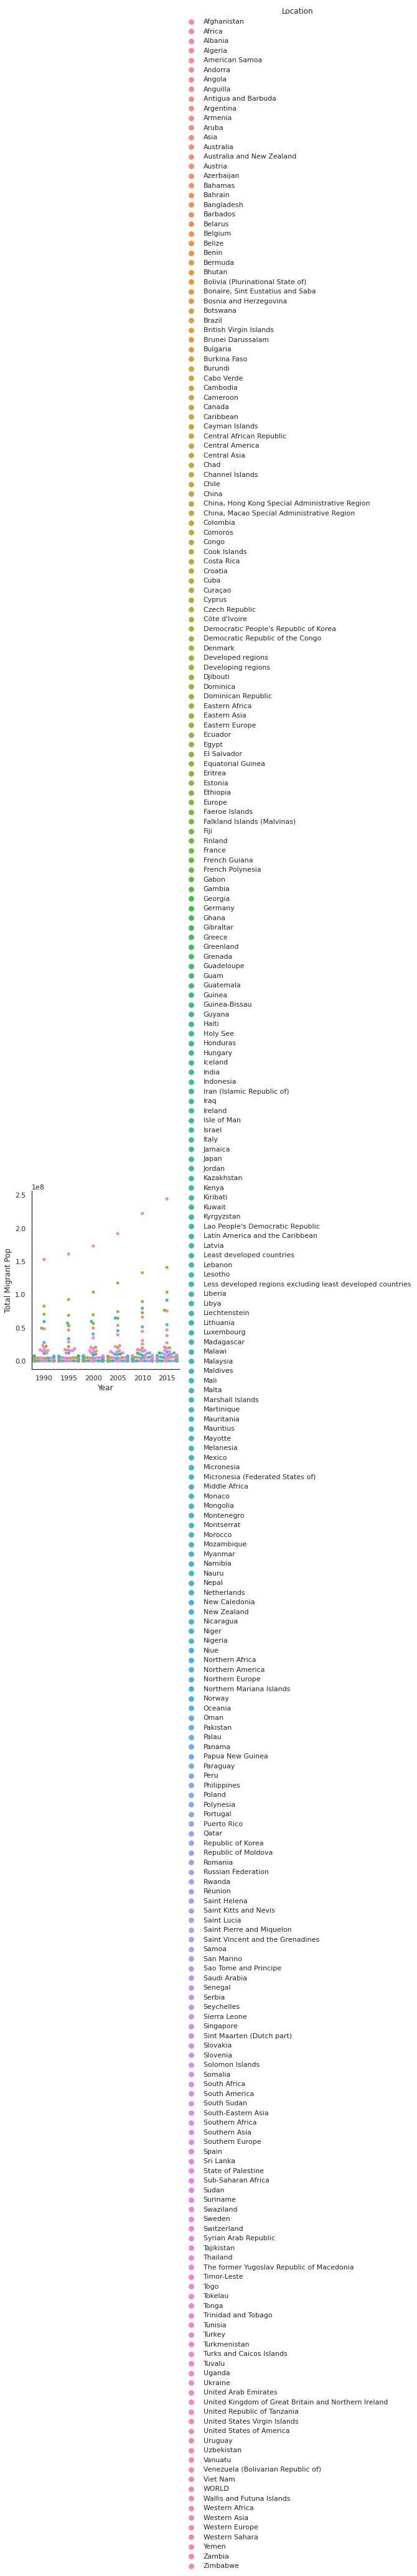

In [177]:
sns.catplot(x='Year', y='Total Migrant Pop', 
             data=TidiedTable1,  hue="Location", kind="swarm",
            );
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0).remove()

In [156]:
world=Table_E.loc['WORLD'].reset_index(drop=False)
index_w=pd.Series(range(6))
world=world.set_index([index_w])
world['Year']=world['Year'].astype(int)
world

,Code,Year,Total Pop,% Total Migrant,Male Total Pop,% Male Migrant,Female Total Pop,% Female Migrant,Total Migrant Pop,Male Migrant Pop,Female Migrant Pop,Female Migrant Pop %,Total Refugee in Migrant Pop,% Refugee in Migrant Pop
0,900,1990,5309667.70,2.87,2670423.70,2.91,2639244.00,2.83,152563212.0,77747510.0,74815702.0,49.04,18836571.0,12.35
1,900,1995,5735123.08,2.80,2886635.89,2.83,2848487.19,2.78,160801752.0,81737477.0,79064275.0,49.17,17853840.0,11.10
2,900,2000,6126622.12,2.82,3084537.66,2.85,3042084.46,2.79,172703309.0,87884839.0,84818470.0,49.11,15827803.0,9.16
3,900,2005,6519635.85,2.93,3285082.25,2.98,3234553.60,2.89,191269100.0,97866674.0,93402426.0,48.83,13276733.0,6.94
4,900,2010,6929725.04,3.20,3493956.90,3.28,3435768.14,3.12,221714243.0,114613714.0,107100529.0,48.31,15370755.0,6.93
5,900,2015,7349472.10,3.32,3707205.75,3.40,3642266.35,3.23,243700236.0,126115435.0,117584801.0,48.25,19577474.0,8.03


In [157]:
migrant_gender=world.drop(columns=['Code', 'Total Pop', '% Total Migrant', 'Male Total Pop',
       '% Male Migrant', 'Female Total Pop', '% Female Migrant','Female Migrant Pop %',
       '% Refugee in Migrant Pop','Total Migrant Pop','Total Refugee in Migrant Pop',]) #'Year','Male Migrant Pop', 'Female Migrant Pop',
migrant_gender

,Year,Male Migrant Pop,Female Migrant Pop
0,1990,77747510.0,74815702.0
1,1995,81737477.0,79064275.0
2,2000,87884839.0,84818470.0
3,2005,97866674.0,93402426.0
4,2010,114613714.0,107100529.0
5,2015,126115435.0,117584801.0


##World Migrants by gender

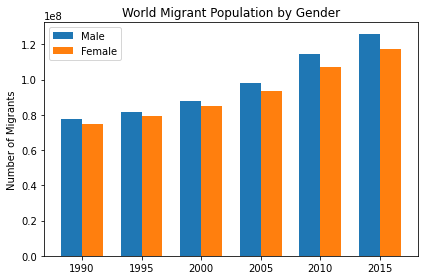

In [158]:
import matplotlib.pyplot as plt
import numpy as np

#labels = ['1990', '1995', '2000', '2005','2010','2015']
labels = world['Year']
#labels =labels.to_numpy()
Male = world['Male Migrant Pop']
Female = world['Female Migrant Pop']

#x=labels
x = np.arange(len(labels))
#x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
#rects1 = ax.bar(labels, Male, width, label='Male')
#rects2 = ax.bar(labels, Female, width, label='Female')
rects1 = ax.bar(x - width/2, Male, width, label='Male')
rects2 = ax.bar(x + width/2, Female, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Migrants')
ax.set_title('World Migrant Population by Gender')

#xticklabels = labels
ax.set_xticklabels(['0','1990', '1995', '2000', '2005','2010','2015'])
ax.legend()


#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [159]:
migrant_ref=world.drop(columns=['Code', 'Total Pop', '% Total Migrant', 'Male Total Pop',
       '% Male Migrant', 'Female Total Pop', '% Female Migrant',
       'Male Migrant Pop', 'Female Migrant Pop',
       'Female Migrant Pop %','% Refugee in Migrant Pop']) #'Total Migrant Pop' ,'Total Refugee in Migrant Pop','Year'
migrant_ref

,Year,Total Migrant Pop,Total Refugee in Migrant Pop
0,1990,152563212.0,18836571.0
1,1995,160801752.0,17853840.0
2,2000,172703309.0,15827803.0
3,2005,191269100.0,13276733.0
4,2010,221714243.0,15370755.0
5,2015,243700236.0,19577474.0


#Q2. Number of refugees in the world migrant population

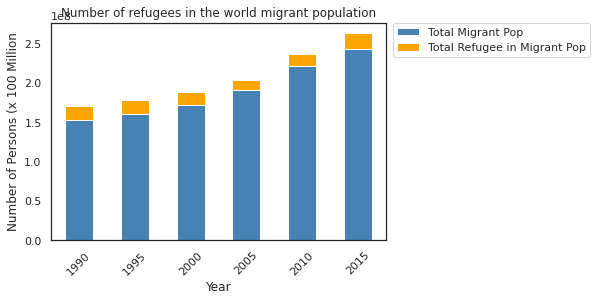

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')

#create stacked bar chart
migrant_ref.set_index('Year').plot(kind='bar', stacked=True, color=['steelblue', 'orange'])

#add overall title
plt.title('Number of refugees in the world migrant population', fontsize=12)

#add axis titles
plt.xlabel('Year')
plt.ylabel('Number of Persons (x 100 Million')

#rotate x-axis labels
plt.xticks(rotation=45)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [163]:
ref_per=world
ref_per=world.drop(columns=['Code', 'Total Pop', '% Total Migrant', 'Male Total Pop',
       '% Male Migrant', 'Female Total Pop', '% Female Migrant',
       'Male Migrant Pop', 'Female Migrant Pop',
       'Female Migrant Pop %','Total Migrant Pop' ,'Total Refugee in Migrant Pop']) #'% Refugee in Migrant Pop', 'Year',
ref_per

,Year,% Refugee in Migrant Pop
0,1990,12.35
1,1995,11.10
2,2000,9.16
3,2005,6.94
4,2010,6.93
5,2015,8.03


##Percentage refugees in the world migrant population

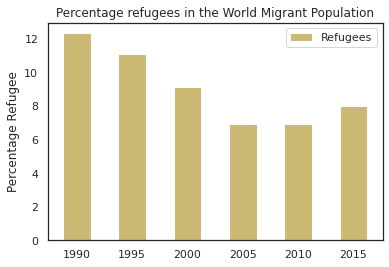

In [170]:
import matplotlib.pyplot as plt


labels = ref_per['Year']
refugees = ref_per['% Refugee in Migrant Pop']
width = 2.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, refugees, width, label='Refugees', color='y')

ax.set_ylabel('Percentage Refugee')
ax.set_title('Percentage refugees in the World Migrant Population')
ax.legend()

plt.show()

No handles with labels found to put in legend.


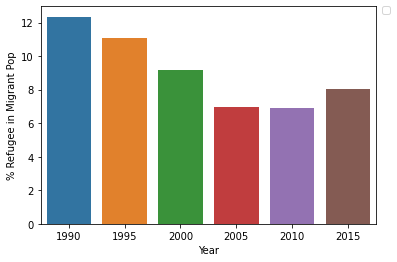

In [386]:
sns.barplot(x='Year', y='% Refugee in Migrant Pop', #hue="Location",
             data=world,  
            );
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


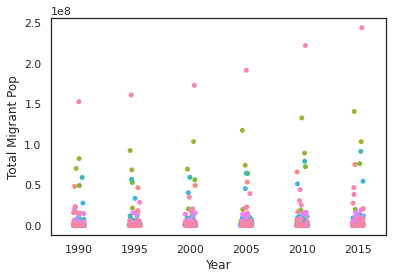

In [176]:
sns.stripplot(x='Year', y='Total Migrant Pop', 
             data=TidiedTable1,  hue="Location", #kind="swarm",
            );
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0).remove()

#Q3. Migrant and Refugee Populations by Developed Nation Status

In [190]:
Developed=Table_E.loc[["Developed regions",'Less developed regions excluding least developed countries','Least developed countries']].reset_index(drop=False)
Developed

,Location,Code,Year,Total Pop,% Total Migrant,Male Total Pop,% Male Migrant,Female Total Pop,% Female Migrant,Total Migrant Pop,Male Migrant Pop,Female Migrant Pop,Female Migrant Pop %,Total Refugee in Migrant Pop,% Refugee in Migrant Pop
0,Developed regions,901,1990,1144463.06,7.20,555255.63,7.25,589207.44,7.15,82378628.0,40263397.0,42115231.0,51.12,2014564.0,2.45
1,Developed regions,901,1995,1169761.21,7.89,568268.46,7.94,601492.76,7.85,92306854.0,45092799.0,47214055.0,51.15,3609670.0,3.91
2,Developed regions,901,2000,1188811.73,8.70,578010.22,8.74,610801.51,8.65,103375363.0,50536796.0,52838567.0,51.11,2997256.0,2.90
3,Developed regions,901,2005,1208919.51,9.69,587962.21,9.73,620957.30,9.66,117181109.0,57217777.0,59963332.0,51.17,2361229.0,2.02
4,Developed regions,901,2010,1233375.71,10.75,599955.48,10.68,633420.24,10.81,132560325.0,64081077.0,68479248.0,51.66,2046917.0,1.54
5,Developed regions,901,2015,1251351.09,11.23,609297.15,11.10,642053.94,11.35,140481955.0,67618619.0,72863336.0,51.87,1954224.0,1.39
6,Less developed regions excluding least develop...,934,1990,3655147.01,1.62,1861125.52,1.70,1794021.49,1.53,59105261.0,31641006.0,27464255.0,46.47,11773616.0,19.92
7,Less developed regions excluding least develop...,934,1995,3980172.52,1.43,2026340.70,1.51,1953831.82,1.34,56778501.0,30501966.0,26276535.0,46.28,9084039.0,16.00
8,Less developed regions excluding least develop...,934,2000,4273424.30,1.39,2175044.97,1.47,2098379.33,1.30,59244124.0,31986141.0,27257983.0,46.01,9783059.0,16.51
9,Less developed regions excluding least develop...,934,2005,4557911.39,1.41,2321362.32,1.52,2236549.07,1.30,64272611.0,35265888.0,29006723.0,45.13,8551722.0,13.31


In [ ]:
test_mean=Table_E.reset_index(drop=False)
index_t=pd.Series(range(1590))
test_mean=test_mean.set_index([index_t])
test_mean['Year']=test_mean['Year'].astype(int)
test_mean

##Migrant Pop in developed and less developed nations


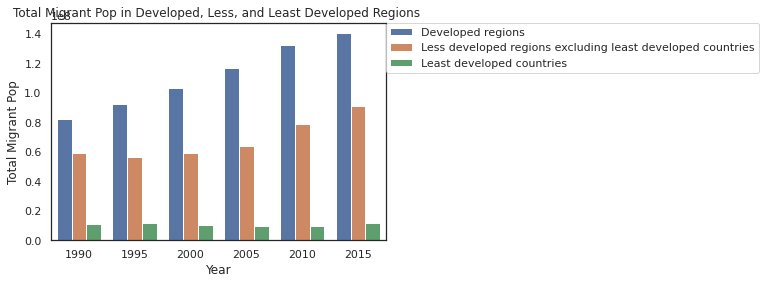

In [193]:
sns.barplot(x='Year', y="Total Migrant Pop", hue="Location",
             data=Developed,  
            ).set_title("Total Migrant Pop in Developed, Less, and Least Developed Regions ")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)


##Total Refugees in Developed and Least Developed Regions

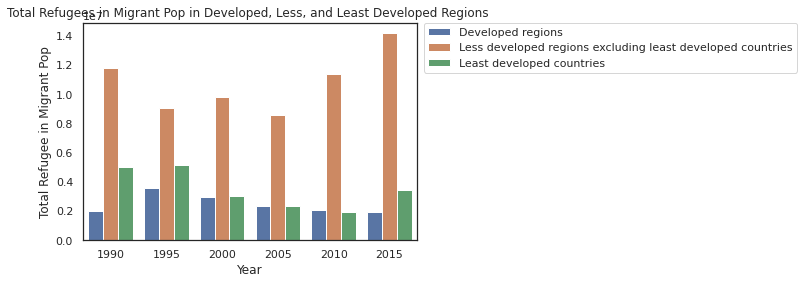

In [195]:
sns.barplot(x='Year', y="Total Refugee in Migrant Pop", hue="Location",
             data=Developed,  
            ).set_title("Total Refugees in Migrant Pop in Developed, Less, and Least Developed Regions ")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

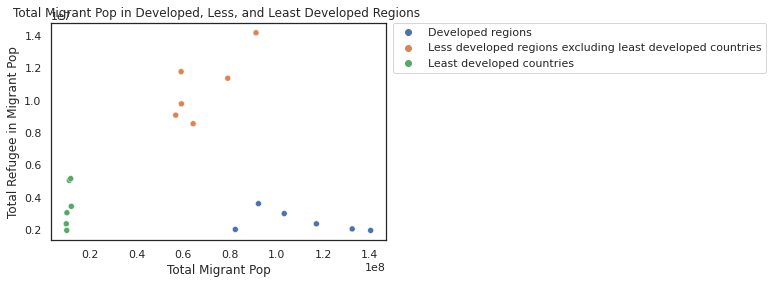

In [196]:
sns.scatterplot(x='Total Migrant Pop', y='Total Refugee in Migrant Pop',
                hue='Location', data=Developed).set_title("Total Migrant Pop in Developed, Less, and Least Developed Regions ")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

No handles with labels found to put in legend.


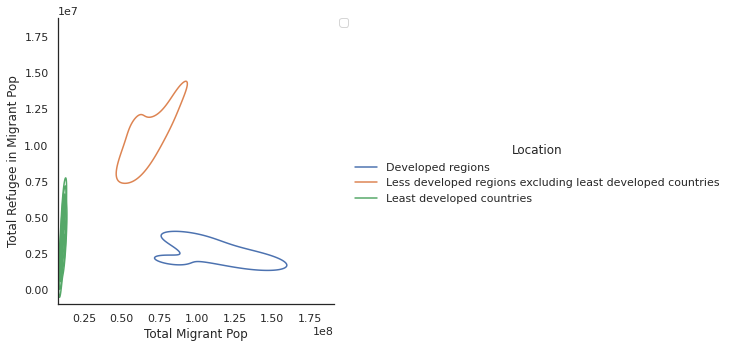

In [407]:
sns.displot(x='Total Migrant Pop', y='Total Refugee in Migrant Pop', hue='Location', data=Developed, kind='kde')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

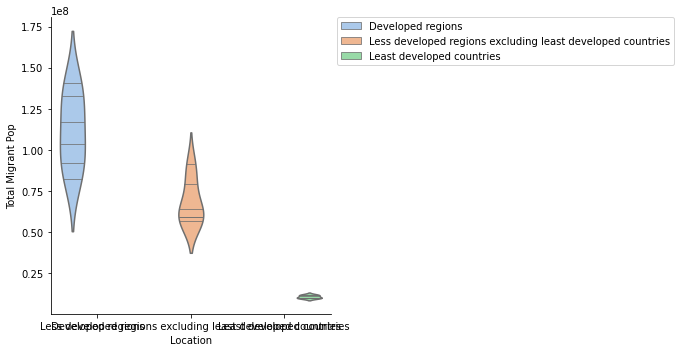

In [373]:
sns.catplot(x="Location", y="Total Migrant Pop", hue="Location",
            kind="violin", inner="stick", split=False,
            palette="pastel", data=Developed)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 81.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 82.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


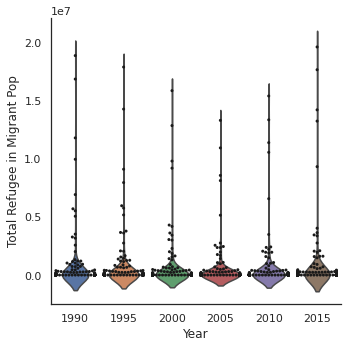

In [409]:
g = sns.catplot(x="Year", y="Total Refugee in Migrant Pop", kind="violin", inner=None, data=TidiedTable1)
sns.swarmplot(x="Year", y="Total Refugee in Migrant Pop", color="k", size=3, data=TidiedTable1, ax=g.ax)

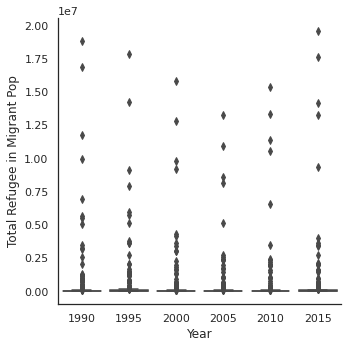

In [430]:
sns.catplot(x="Year", y="Total Refugee in Migrant Pop", kind="box", data=TidiedTable1)

#Q4. Most Developed Nations with Highest Migrant and Refugee Populations

#MostD

In [203]:
MostD=LeastD1.loc[['Belarus','Bulgaria', 'Czech Republic', 'Hungary', 'Poland', 'Republic of Moldova','Romania',
                  'Russian Federation','Slovakia','Ukraine','Channel Islands', 'Denmark','Estonia','Faeroe Islands',
                  'Finland','Iceland','Ireland','Isle of Man', 'Latvia', 'Lithuania', 'Norway', 'Sweden', 
                  'United Kingdom of Great Britain and Northern Ireland', 'Albania', 'Andorra','Bosnia and Herzegovina', 
                  'Croatia', 'Gibraltar', 'Greece', 'Holy See', 'Italy', 'Malta', 'Montenegro', 'Portugal', 'San Marino', 
                  'Serbia', 'Slovenia', 'Spain', 'The former Yugoslav Republic of Macedonia', 'Austria', 'Belgium', 'France', 
                  'Germany', 'Liechtenstein', 'Luxembourg', 'Monaco', 'Netherlands', 'Switzerland', 'Bermuda', 'Canada', 
                  'Greenland', 'Saint Pierre and Miquelon', 'United States of America', 'Australia', 'New Zealand', 'Japan']]

MostD

In [204]:
MostD=MostD.reset_index(drop=True)
index_MD=pd.Series(range(336))
MostD=MostD.set_index([index_MD])
MostD['Year']=MostD['Year'].astype(int)
MostD

,Location,Code,Year,Total Pop,% Total Migrant,Male Total Pop,% Male Migrant,Female Total Pop,% Female Migrant,Total Migrant Pop,Male Migrant Pop,Female Migrant Pop,Female Migrant Pop %,Total Refugee in Migrant Pop,% Refugee in Migrant Pop
0,Belarus,112,1990,10231.98,12.21,4800.05,11.92,5431.93,12.46,1248977.0,572021.0,676956.0,54.20,0.0,0.00
1,Belarus,112,1995,10159.73,11.68,4764.57,11.40,5395.16,11.92,1186282.0,543307.0,642975.0,54.20,180.0,0.02
2,Belarus,112,2000,9952.06,11.29,4672.80,11.01,5279.25,11.54,1123586.0,514593.0,608993.0,54.20,359.0,0.03
3,Belarus,112,2005,9640.62,11.48,4501.67,11.26,5138.95,11.68,1106982.0,506988.0,599994.0,54.20,474.0,0.04
4,Belarus,112,2010,9492.12,11.49,4413.69,11.31,5078.44,11.64,1090378.0,499384.0,590994.0,54.20,589.0,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,Japan,392,1995,124483.30,1.11,61010.32,1.10,63472.99,1.12,1381097.0,672482.0,708615.0,51.31,5322.0,0.39
332,Japan,392,2000,125714.67,1.34,61490.43,1.30,64224.24,1.39,1686567.0,796977.0,889590.0,52.75,3752.0,0.22
333,Japan,392,2005,126978.75,1.59,61955.53,1.49,65023.23,1.67,2012916.0,924544.0,1088372.0,54.07,1941.0,0.10
334,Japan,392,2010,127319.80,1.68,62017.76,1.55,65302.05,1.80,2134151.0,959860.0,1174291.0,55.02,2586.0,0.12


##Top 5 Most Developed countries with highest number of Migrants

In [211]:
Top10MDm = MostD.groupby(["Year"]).apply(lambda x: x.sort_values(["Total Migrant Pop"], ascending = False)).reset_index(drop=True)
Top10MDm=Top10MDm.groupby('Year').head(5)
Top10MDm


,Location,Code,Year,Total Pop,% Total Migrant,Male Total Pop,% Male Migrant,Female Total Pop,% Female Migrant,Total Migrant Pop,Male Migrant Pop,Female Migrant Pop,Female Migrant Pop %,Total Refugee in Migrant Pop,% Refugee in Migrant Pop
0,United States of America,840,1990,252847.81,9.20,123979.49,9.17,128868.32,9.22,23251026.0,11372985.0,11878041.0,51.09,438193.0,1.88
1,Russian Federation,643,1990,147568.55,7.81,69087.06,8.19,78481.49,7.48,11524948.0,5655422.0,5869526.0,50.93,0.0,0.00
2,Ukraine,804,1990,51370.01,13.42,23884.98,12.37,27485.03,14.33,6892920.0,2953603.0,3939317.0,57.15,0.0,0.00
3,Germany,276,1990,78958.24,7.52,38125.10,8.64,40833.13,6.47,5936181.0,3293128.0,2643053.0,44.52,722250.0,12.17
4,France,250,1990,56943.30,10.36,27960.17,10.73,28983.13,10.00,5897267.0,2999376.0,2897891.0,49.14,186629.0,3.16
56,United States of America,840,1995,266275.53,10.68,130962.11,10.71,135313.42,10.66,28451053.0,14032159.0,14418894.0,50.68,623294.0,2.19
57,Russian Federation,643,1995,148293.27,8.04,69570.65,8.52,78722.61,7.63,11928927.0,5925452.0,6003475.0,50.33,0.0,0.00
58,Germany,276,1995,81612.90,9.15,39772.46,9.80,41840.44,8.52,7464406.0,3898397.0,3566009.0,47.77,1267900.0,16.99
59,Ukraine,804,1995,50811.67,12.15,23684.16,11.17,27127.51,13.00,6172338.0,2644845.0,3527493.0,57.15,5193.0,0.08
60,France,250,1995,58224.05,10.46,28533.08,10.68,29690.97,10.25,6087993.0,3046083.0,3041910.0,49.97,155245.0,2.55


##Top 5 Most Developed countries with highest Average number Refugees

In [212]:
Top10MDr = MostD.groupby(["Year"]).apply(lambda x: x.sort_values(["Total Refugee in Migrant Pop"], ascending = False)).reset_index(drop=True)
Top10MDr=Top10MDr.groupby('Year').head(5)
Top10MDr

,Location,Code,Year,Total Pop,% Total Migrant,Male Total Pop,% Male Migrant,Female Total Pop,% Female Migrant,Total Migrant Pop,Male Migrant Pop,Female Migrant Pop,Female Migrant Pop %,Total Refugee in Migrant Pop,% Refugee in Migrant Pop
0,Germany,276,1990,78958.24,7.52,38125.10,8.64,40833.13,6.47,5936181.0,3293128.0,2643053.0,44.52,722250.0,12.17
1,United States of America,840,1990,252847.81,9.20,123979.49,9.17,128868.32,9.22,23251026.0,11372985.0,11878041.0,51.09,438193.0,1.88
2,France,250,1990,56943.30,10.36,27960.17,10.73,28983.13,10.00,5897267.0,2999376.0,2897891.0,49.14,186629.0,3.16
3,Canada,124,1990,27662.44,15.66,13715.67,15.38,13946.77,15.94,4333318.0,2109652.0,2223666.0,51.32,145257.0,3.35
4,Sweden,752,1990,8559.11,9.22,4228.00,9.06,4331.10,9.37,788767.0,383085.0,405682.0,51.43,124723.0,15.81
56,Germany,276,1995,81612.90,9.15,39772.46,9.80,41840.44,8.52,7464406.0,3898397.0,3566009.0,47.77,1267900.0,16.99
57,United States of America,840,1995,266275.53,10.68,130962.11,10.71,135313.42,10.66,28451053.0,14032159.0,14418894.0,50.68,623294.0,2.19
58,Serbia,688,1995,9884.15,6.38,4870.55,5.94,5013.60,6.80,630221.0,289545.0,340676.0,54.06,409941.0,65.05
59,Sweden,752,1995,8826.72,10.60,4360.94,10.34,4465.78,10.86,936022.0,450945.0,485077.0,51.82,199212.0,21.28
60,Croatia,191,1995,4616.76,14.60,2233.20,14.14,2383.56,15.03,674085.0,315733.0,358352.0,53.16,198647.0,29.47


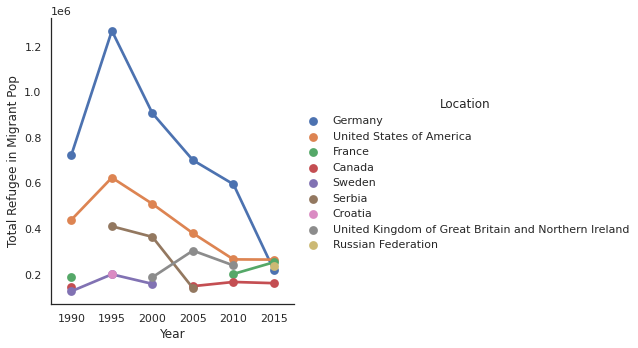

In [220]:
sns.catplot(x='Year', y='Total Refugee in Migrant Pop', 
             data=Top10MDr,  hue="Location", kind="point",
            );
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)#.remove()
#catplot

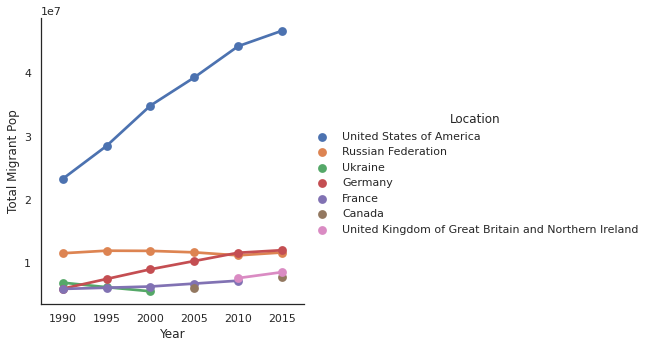

In [224]:
sns.catplot(x='Year', y='Total Migrant Pop', 
             data=Top10MDm,  hue="Location", kind="point",
            );#.set_title("Top 5 Total Migrant Pop Trends in Most Developed Nations")
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)#.remove()
#stripplot

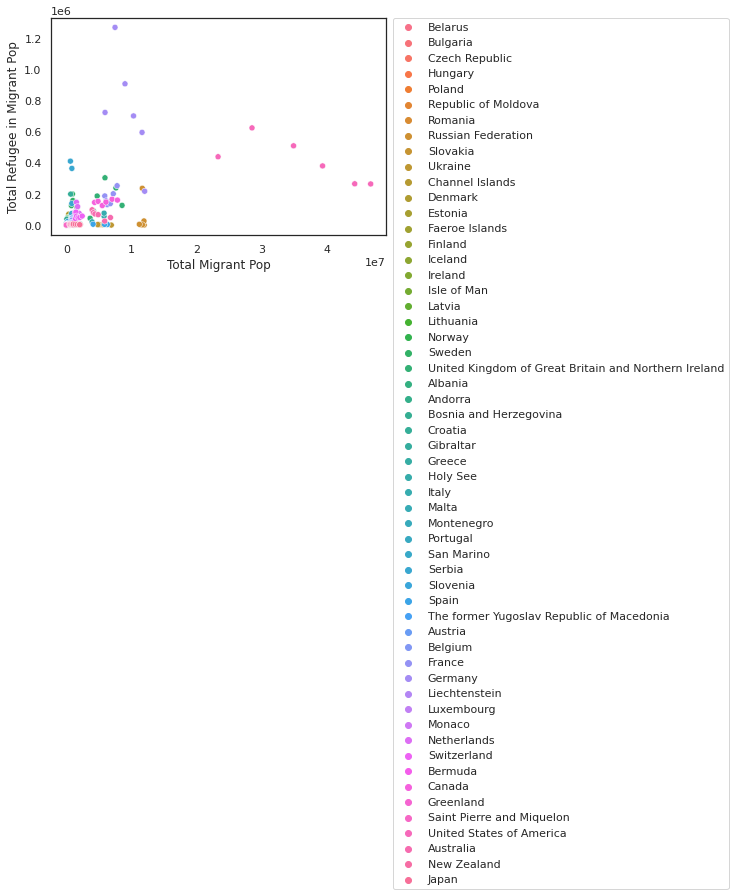

In [222]:
sns.scatterplot(x='Total Migrant Pop', y='Total Refugee in Migrant Pop', hue='Location', data=MostD)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)#.remove()

#Q5. Least Developed Nations with Highest Migrant and Refugee Populations

#LeastD

In [202]:
LeastD1 =Table_E.reset_index(drop=False)
#= test_mean

index_LD=LeastD1['Location']
LeastD1=LeastD1.set_index([index_LD])
LeastD1

,Location,Code,Year,Total Pop,% Total Migrant,Male Total Pop,% Male Migrant,Female Total Pop,% Female Migrant,Total Migrant Pop,Male Migrant Pop,Female Migrant Pop,Female Migrant Pop %,Total Refugee in Migrant Pop,% Refugee in Migrant Pop
Location,,,,,,,,,,,,,,,
Afghanistan,Afghanistan,4,1990,12067.57,0.48,6179.83,0.53,5887.74,0.43,57686.0,32558.0,25128.0,43.56,25.0,0.04
Afghanistan,Afghanistan,4,1995,16772.52,0.43,8682.44,0.45,8090.08,0.40,71522.0,39105.0,32417.0,45.32,19605.0,27.41
Afghanistan,Afghanistan,4,2000,19701.94,0.39,10146.54,0.42,9555.40,0.35,75917.0,42848.0,33069.0,43.56,0.0,0.00
Afghanistan,Afghanistan,4,2005,24399.95,0.36,12616.33,0.39,11783.62,0.32,87300.0,49274.0,38026.0,43.56,32.0,0.04
Afghanistan,Afghanistan,4,2010,27962.21,0.37,14367.63,0.40,13594.57,0.33,102246.0,57709.0,44537.0,43.56,6434.0,6.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,Zimbabwe,716,1995,11683.14,3.69,5805.63,4.24,5877.50,3.15,431226.0,246012.0,185214.0,42.95,514.0,0.12
Zimbabwe,Zimbabwe,716,2000,12499.98,3.28,6219.85,3.76,6280.13,2.81,410041.0,233843.0,176198.0,42.97,4127.0,1.01
Zimbabwe,Zimbabwe,716,2005,12984.42,3.02,6436.24,3.48,6548.18,2.58,392693.0,223970.0,168723.0,42.97,4435.0,1.13


In [183]:
LeastD=LeastD1.loc[['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Burkina Faso', 'Burundi', 
           'Cambodia', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 
           'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gambia', 'Guinea', 'Guinea-Bissau', 
           'Haiti', 'Kiribati', 'Lao People\'s Democratic Republic', 'Lesotho', 'Liberia', 
           'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Rwanda',
           'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'Somalia', 'South Sudan', 'Sudan', 
           'Timor-Leste', 'Togo', 'Tuvalu', 'Uganda', 'United Republic of Tanzania', 'Vanuatu', 'Yemen', 'Zambia']]

In [219]:
LeastD=LeastD.reset_index(drop=True)
index_LD=pd.Series(range(288))
LeastD=LeastD.set_index([index_LD])
LeastD['Year']=LeastD['Year'].astype(int)
LeastD

,Location,Code,Year,Total Pop,% Total Migrant,Male Total Pop,% Male Migrant,Female Total Pop,% Female Migrant,Total Migrant Pop,Male Migrant Pop,Female Migrant Pop,Female Migrant Pop %,Total Refugee in Migrant Pop,% Refugee in Migrant Pop
0,Afghanistan,4,1990,12067.57,0.48,6179.83,0.53,5887.74,0.43,57686.0,32558.0,25128.0,43.56,25.0,0.04
1,Afghanistan,4,1995,16772.52,0.43,8682.44,0.45,8090.08,0.40,71522.0,39105.0,32417.0,45.32,19605.0,27.41
2,Afghanistan,4,2000,19701.94,0.39,10146.54,0.42,9555.40,0.35,75917.0,42848.0,33069.0,43.56,0.0,0.00
3,Afghanistan,4,2005,24399.95,0.36,12616.33,0.39,11783.62,0.32,87300.0,49274.0,38026.0,43.56,32.0,0.04
4,Afghanistan,4,2010,27962.21,0.37,14367.63,0.40,13594.57,0.33,102246.0,57709.0,44537.0,43.56,6434.0,6.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Zambia,894,1995,9253.53,2.64,4589.10,2.73,4664.43,2.55,244338.0,125329.0,119009.0,48.71,129965.0,53.19
284,Zambia,894,2000,10585.22,3.03,5257.24,3.11,5327.98,2.96,321167.0,163620.0,157547.0,49.05,228663.0,71.20
285,Zambia,894,2005,12043.59,2.10,5997.52,2.14,6046.07,2.05,252749.0,128553.0,124196.0,49.14,155718.0,61.61
286,Zambia,894,2010,13917.44,1.08,6942.75,1.09,6974.69,1.06,149637.0,75775.0,73862.0,49.36,47857.0,31.98


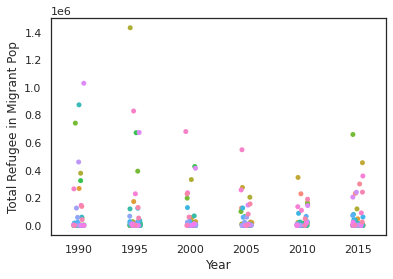

In [422]:
sns.stripplot(x='Year', y='Total Refugee in Migrant Pop', 
             data=LeastD,  hue="Location", #kind="swarm",
            );
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0).remove()

##Top 5 least developed nations with highest Migrant populations

In [225]:
Top10LDm = LeastD.groupby(["Year"]).apply(lambda x: x.sort_values(["Total Migrant Pop"], ascending = False)).reset_index(drop=True)
Top10LDm=Top10LDm.groupby('Year').head(5)
Top10LDm

#LeastD

,Location,Code,Year,Total Pop,% Total Migrant,Male Total Pop,% Male Migrant,Female Total Pop,% Female Migrant,Total Migrant Pop,Male Migrant Pop,Female Migrant Pop,Female Migrant Pop %,Total Refugee in Migrant Pop,% Refugee in Migrant Pop
0,Sudan,729,1990,20008.80,7.01,10046.71,6.93,9962.09,7.09,1402896.0,696385.0,706511.0,50.36,1031050.0,73.49
1,Ethiopia,231,1990,48057.09,2.40,23965.65,2.53,24091.45,2.28,1155390.0,607284.0,548106.0,47.44,741965.0,64.22
2,Malawi,454,1990,9409.00,11.99,4623.17,11.82,4785.83,12.14,1127724.0,546520.0,581204.0,51.54,874614.0,77.56
3,Bangladesh,50,1990,105983.14,0.83,54175.31,1.40,51807.83,0.24,881617.0,759452.0,122165.0,13.86,73.0,0.01
4,Democratic Republic of the Congo,180,1990,34962.68,2.16,17255.34,2.10,17707.34,2.21,754194.0,363117.0,391077.0,51.85,378562.0,50.19
48,Democratic Republic of the Congo,180,1995,42183.62,4.31,20879.78,4.32,21303.84,4.30,1816963.0,901379.0,915584.0,50.39,1433760.0,78.91
49,United Republic of Tanzania,834,1995,29903.33,3.70,14835.23,3.69,15068.10,3.71,1106043.0,547089.0,558954.0,50.54,829671.0,75.01
50,Sudan,729,1995,24691.97,4.27,12397.94,4.24,12294.02,4.29,1053396.0,525701.0,527695.0,50.09,674071.0,63.99
51,Bangladesh,50,1995,118427.77,0.79,60474.59,1.33,57953.18,0.22,934735.0,805196.0,129539.0,13.86,10996.0,1.18
52,Ethiopia,231,1995,57237.23,1.41,28536.00,1.49,28701.22,1.33,806904.0,424117.0,382787.0,47.44,393479.0,48.76


##Top 5 least developed nations with highest refugee in Migrant Population

In [227]:
Top10LDr=LeastD.groupby(['Year']).apply(lambda x: x.sort_values(["Total Refugee in Migrant Pop"], ascending = False)).reset_index(drop=True)
Top10LDr=Top10LDr.groupby('Year').head(5)
Top10LDr



,Location,Code,Year,Total Pop,% Total Migrant,Male Total Pop,% Male Migrant,Female Total Pop,% Female Migrant,Total Migrant Pop,Male Migrant Pop,Female Migrant Pop,Female Migrant Pop %,Total Refugee in Migrant Pop,% Refugee in Migrant Pop
0,Sudan,729,1990,20008.80,7.01,10046.71,6.93,9962.09,7.09,1402896.0,696385.0,706511.0,50.36,1031050.0,73.49
1,Malawi,454,1990,9409.00,11.99,4623.17,11.82,4785.83,12.14,1127724.0,546520.0,581204.0,51.54,874614.0,77.56
2,Ethiopia,231,1990,48057.09,2.40,23965.65,2.53,24091.45,2.28,1155390.0,607284.0,548106.0,47.44,741965.0,64.22
3,Somalia,706,1990,6321.62,7.57,3130.36,7.80,3191.26,7.34,478294.0,244201.0,234093.0,48.94,460000.0,96.18
4,Democratic Republic of the Congo,180,1990,34962.68,2.16,17255.34,2.10,17707.34,2.21,754194.0,363117.0,391077.0,51.85,378562.0,50.19
48,Democratic Republic of the Congo,180,1995,42183.62,4.31,20879.78,4.32,21303.84,4.30,1816963.0,901379.0,915584.0,50.39,1433760.0,78.91
49,United Republic of Tanzania,834,1995,29903.33,3.70,14835.23,3.69,15068.10,3.71,1106043.0,547089.0,558954.0,50.54,829671.0,75.01
50,Sudan,729,1995,24691.97,4.27,12397.94,4.24,12294.02,4.29,1053396.0,525701.0,527695.0,50.09,674071.0,63.99
51,Guinea,324,1995,7863.03,9.85,3900.10,9.91,3962.93,9.79,774505.0,386537.0,387968.0,50.09,672298.0,86.80
52,Ethiopia,231,1995,57237.23,1.41,28536.00,1.49,28701.22,1.33,806904.0,424117.0,382787.0,47.44,393479.0,48.76


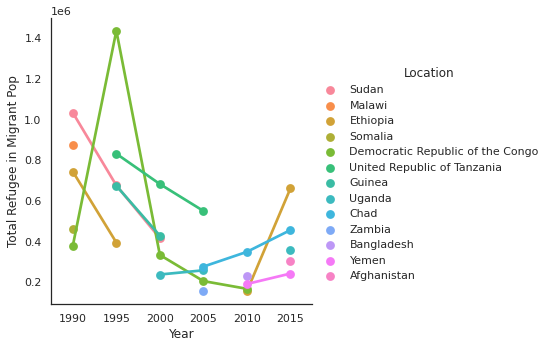

In [228]:
sns.catplot(x='Year', y='Total Refugee in Migrant Pop', 
             data=Top10LDr,  hue="Location", kind="point",
            );
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)#.remove()
#catplot

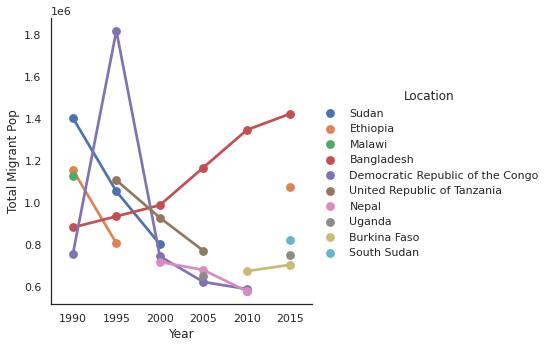

In [229]:
sns.catplot(x='Year', y='Total Migrant Pop', 
             data=Top10LDm,  hue="Location", kind="point",
            );#.set_title("Top 5 Total Migrant Pop Trends in Most Developed Nations")
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)#.remove()
#stripplot

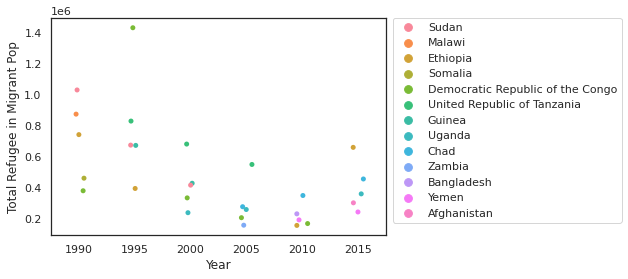

In [230]:
sns.stripplot(x='Year', y='Total Refugee in Migrant Pop', 
             data=Top10LDr,  hue="Location", #kind="swarm",
            );
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)#.remove()
#catplot

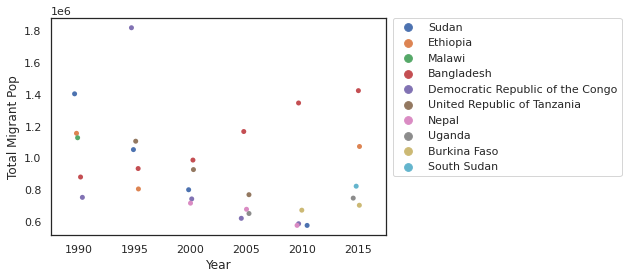

In [233]:
sns.stripplot(x='Year', y='Total Migrant Pop', 
             data=Top10LDm,  hue="Location", #kind="swarm",
            );
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)#.remove()
#catplot

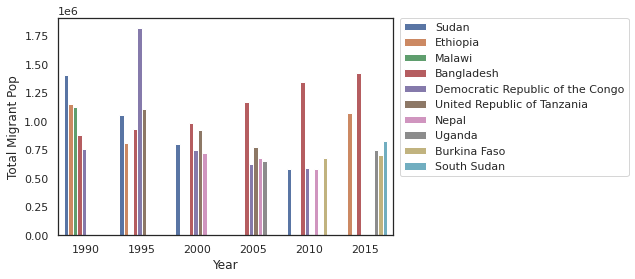

In [234]:
sns.barplot(x='Year', y="Total Migrant Pop", hue="Location",
             data=Top10LDm,  
            );
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
fig_dims = (20, 18)

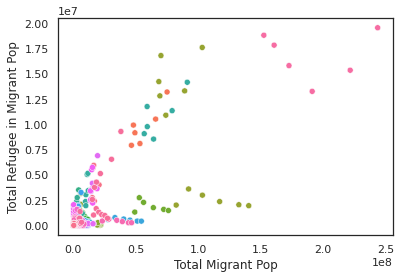

In [435]:
sns.scatterplot(x='Total Migrant Pop', y='Total Refugee in Migrant Pop', hue='Location', data=TidiedTable1)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0).remove()

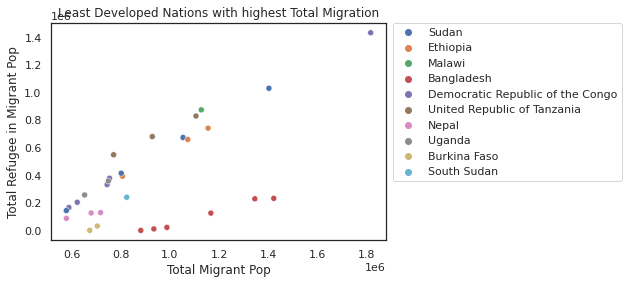

In [237]:
sns.scatterplot(x='Total Migrant Pop', y='Total Refugee in Migrant Pop', 
                hue='Location', data=Top10LDm).set_title("Least Developed Nations with highest Total Migration")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)#.remove()

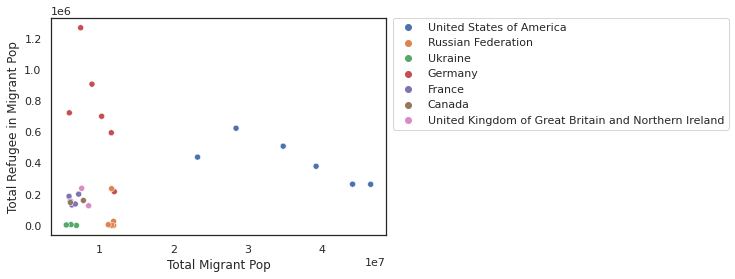

In [236]:
sns.scatterplot(x='Total Migrant Pop', y='Total Refugee in Migrant Pop', hue='Location', data=Top10MDm)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)#.remove()

#Q6. Rate of Change in Migrant and Refugee Populations by Developed Nation Status.

#ROC Migrant

In [239]:
DevelopedMroc=Table_F.reset_index(drop=False)
index_roc=DevelopedMroc['Location']
DevelopedMroc=DevelopedMroc.set_index([index_roc])
DevelopedMroc


,Location,Code,Period,Annual ROC% Total Migrant,Annual ROC% Male Migrant,Annual ROC% Female Migrant,Annual ROC% Refugee
Location,,,,,,,
Afghanistan,Afghanistan,4,1990-1995,4.30,3.66,5.09,128.99
Afghanistan,Afghanistan,4,1995-2000,1.19,1.83,0.40,NaN
Afghanistan,Afghanistan,4,2000-2005,2.79,2.79,2.79,NaN
Afghanistan,Afghanistan,4,2005-2010,3.16,3.16,3.16,102.91
Afghanistan,Afghanistan,4,2010-2015,26.38,24.19,28.90,50.50
...,...,...,...,...,...,...,...
Zimbabwe,Zimbabwe,716,1990-1995,-7.48,-7.17,-7.89,-110.04
Zimbabwe,Zimbabwe,716,1995-2000,-1.01,-1.01,-1.00,42.67
Zimbabwe,Zimbabwe,716,2000-2005,-0.86,-0.86,-0.87,2.30


In [240]:
DevelopedMroc=DevelopedMroc.loc[["Developed regions", 'Less developed regions excluding least developed countries',
                                 'Least developed countries']]

DevelopedMroc

,Location,Code,Period,Annual ROC% Total Migrant,Annual ROC% Male Migrant,Annual ROC% Female Migrant,Annual ROC% Refugee
Location,,,,,,,
Developed regions,Developed regions,901,1990-1995,2.28,2.27,2.29,9.39
Developed regions,Developed regions,901,1995-2000,2.26,2.28,2.25,-5.98
Developed regions,Developed regions,901,2000-2005,2.51,2.48,2.53,-7.28
Developed regions,Developed regions,901,2005-2010,2.47,2.27,2.66,-5.32
Developed regions,Developed regions,901,2010-2015,1.16,1.07,1.24,-2.09
Less developed regions excluding least developed countries,Less developed regions excluding least develop...,934,1990-1995,-0.80,-0.73,-0.88,-4.38
Less developed regions excluding least developed countries,Less developed regions excluding least develop...,934,1995-2000,0.85,0.95,0.73,0.63
Less developed regions excluding least developed countries,Less developed regions excluding least develop...,934,2000-2005,1.63,1.95,1.24,-4.32
Less developed regions excluding least developed countries,Less developed regions excluding least develop...,934,2005-2010,4.16,4.91,3.21,1.53


In [241]:
DevelopedMroc1=DevelopedMroc.reset_index(drop=True)
index_roc1=pd.Series(range(15))
DevelopedMroc1=DevelopedMroc1.set_index([index_roc1])
DevelopedMroc1['Period']=DevelopedMroc1['Period'].astype('category')
DevelopedMroc1

,Location,Code,Period,Annual ROC% Total Migrant,Annual ROC% Male Migrant,Annual ROC% Female Migrant,Annual ROC% Refugee
0,Developed regions,901,1990-1995,2.28,2.27,2.29,9.39
1,Developed regions,901,1995-2000,2.26,2.28,2.25,-5.98
2,Developed regions,901,2000-2005,2.51,2.48,2.53,-7.28
3,Developed regions,901,2005-2010,2.47,2.27,2.66,-5.32
4,Developed regions,901,2010-2015,1.16,1.07,1.24,-2.09
5,Less developed regions excluding least develop...,934,1990-1995,-0.80,-0.73,-0.88,-4.38
6,Less developed regions excluding least develop...,934,1995-2000,0.85,0.95,0.73,0.63
7,Less developed regions excluding least develop...,934,2000-2005,1.63,1.95,1.24,-4.32
8,Less developed regions excluding least develop...,934,2005-2010,4.16,4.91,3.21,1.53
9,Less developed regions excluding least develop...,934,2010-2015,2.85,2.87,2.83,1.57


##Annual ROC% Total Migrant

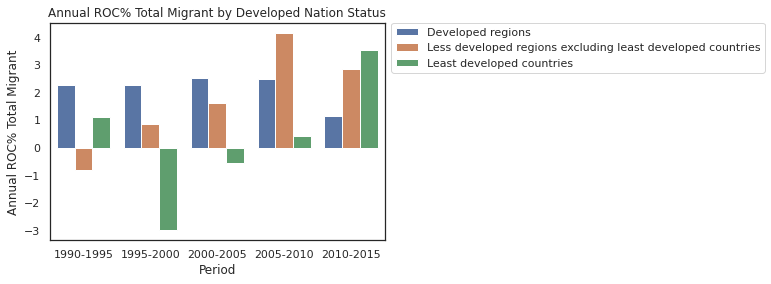

In [242]:
sns.barplot(x='Period', y="Annual ROC% Total Migrant", hue="Location",
             data=DevelopedMroc1,  
            ).set_title("Annual ROC% Total Migrant by Developed Nation Status")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

##ROC Refugee

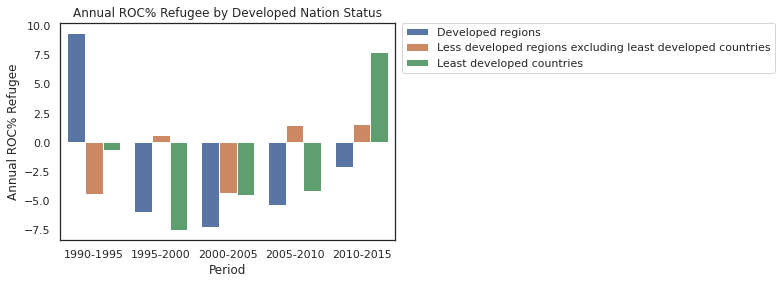

In [244]:
sns.barplot(x='Period', y="Annual ROC% Refugee", hue="Location",
             data=DevelopedMroc1,  
            ).set_title("Annual ROC% Refugee by Developed Nation Status")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

More developed:
Europe, Northern America, Australia/New Zealand and Japan.

Less developed regions comprise all regions of Africa, Asia (except Japan), 
Latin America and the Caribbean plus Melanesia, Micronesia and Polynesia.

Least developed:
Afghanistan, Angola, Bangladesh, Benin, Bhutan, Burkina Faso, Burundi, Cambodia, Central African Republic, Chad, Comoros, Democratic Republic of the Congo, Djibouti, Equatorial Guinea, Eritrea, Ethiopia, Gambia, Guinea, Guinea-Bissau, Haiti, Kiribati, Lao People's Democratic Republic, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Myanmar, Nepal, Niger, Rwanda,  São Tomé and Príncipe, Senegal, Sierra Leone, Solomon Islands, Somalia, South Sudan, Sudan, Timor-Leste, Togo, Tuvalu, Uganda, United Republic of Tanzania, Vanuatu, Yemen and Zambia. These countries are also included in the less developed regions.

In [33]:
!python --version

Python 3.7.12


In [37]:
import matplotlib
print(matplotlib.__version__)

3.2.2


In [38]:
sns.__version__

'0.11.2'